# Машинное обучение, DS-поток
## Задание ML.7K


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 2 &mdash; 90 баллов + бонусные баллы + медальки + гуси.


In [1]:
# Bot check

# HW_ID: ds_ml7k
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

---

### Задача 2

Рассмотрим одну из уже классических задач машинного обучения — предсказание кредитного рейтинга клиентов кредитной организации. В данной задаче вам нужно провести анализ данных, построить классификатор клиентов и отправить свои предсказания в Kaggle-соревнование.

Кредитный скоринг — система оценки кредитоспособности (кредитных рисков) потенциальных и действующих клиентов, в основу которой вкладываются статистические данные. Кредитный скоринг широко используется как крупными банками, микрофинансовыми организациями, так и в потребительском (магазинном) экспресс-кредитовании на небольшие суммы. Также возможно его использование в бизнесе сотовых операторов, страховых компаний и т. д. Скоринг заключается в присвоении баллов по заполнению некой анкеты, разработанной оценщиками кредитных рисков андеррайтерами. По результатам набранных баллов системой автоматически принимается решение об одобрении или отказе в выдаче кредита.

Описание данных:
* `client_id`: уникальный идентификатор клиента;
* `month`: месяц сбора информации;
* `age`: возраст клиента;
* `occupation`: вид деятельность;
* `annual_income`: годовой доход;
* `monthly_salary`: зарплата за текущий месяц;
* `number_bank_accounts`: количество банковских счетов у данного клиента;
* `number_credit_cards`: количество кредитных карт у данного клиента;
* `interest_rate`: процентная ставка по кредитной карте;
* `number_loan`: количество кредитов, взятых в банке;
* `delay_from_due_date`: среднее количество дней задержки выплат по кредиту;
* `number_delayed_payment`: количество платежей по кредиту, которые были выполнены с задержкой;
* `number_credit_inquiries`: количество запросов по кредиту;
* `unpaid_debt`: сумма долга;
* `credit_utilization_ratio`: коэффициент использования кредитных карт;
* `credit_history_age`: размер кредитной истории;
* `min_amount_payment`: была ли произведенная выплата минимально возможной;
* `monthy_amount_invested`: сумма инвестиций за месяц;
* `client_behaviour`: платежное поведение клиента;
* `monthly_balance`: баланс по итогу месяца;
* `credit_rating`: кредитный рейтинг — это **целевой признак**.

Ссылка: https://www.kaggle.com/competitions/ds-2024-autumn-37/

Инвайт: https://www.kaggle.com/t/785866ded4ce4fa09236c47cc2724d65

**Правила**

* В Kaggle в данное тренировочное соревнование можно отправлять не более 7 решений в день (8-ю система не позволит).
* Решения индивидуальные.
* Качество считается по метрике Accuracy.
* До окончания соревнования доступны значения качества, посчитанные только на случайных 30% тестовых данных. Значения отображаются в Public Leaderboard.
* После окончания соревнования становится доступным Private Leaderboard, в котором значения качества посчитанны на оставшихся 70% объектов.
* Для включения в Private Leaderboard можно выбрать две посылки.
* В Leaderboard должны отображаться ваши **реальные имя и фамилия**. В противном случае решение может быть не зачтено.
* Все файлы, которые вы отправляете в соревнование, видны организаторам соревнования. Файлы должны иметь понятное имя, при отправке файла в систему необходимо написать краткое описание решения. **Это будет проверяться.**
* В решении, отправляемом боту, должно быть отображено, результаты каких моделей вы отправляете в соревнование.
* Не забывайте сделать пояснения к своему решению. **Решение может быть не зачтено, если в нем недостаточно пояснений**, даже если удалось попасть в топ-3.
* Пользоваться можно любыми пройденными в наших курсах моделями.
* Нельзя пользоваться любыми методами и моделями, которые мы не проходили, и которых не было в ранее в иных курсах, которые обязательны для всех.
* Код студентов, занявших первые 3 места, будет запускаться. Также выборочно может запускаться код и остальных студентов.

**Советы**

* Чтобы получить действительно хороший результат подбора гиперпараметров мало, попробуйте ввести новые признаки для улучшения качества решения.
* Некоторые инсайты по тому, какие признаки могут улучшить качество, можно получить если провести разведывательный анализ данных (EDA). Например, может иметь смысл изучить датасет на предмет наличия выбросов, исследовать пространственное и временное распределение отклика. 
* Изучите различные методы, предложенные на занятиях.
* Сохраняйте код и результаты каждой модели в отдельных файлах. Добавляйте к ним понятные описания, которые помогут вам при необходимости продолжить использовать решение.

**Сроки сдачи**
 
* **Дедлайн в Kaggle** совпадает с дедлайном по заданию (25.10 16:00). Дедлайн строгий, Kaggle не позволит сдать даже на секунду позже.
* Также **до дедлайна необходимо сдать в бот** существующий вариант решения, возможно, без пояснений.
* **До конца следующих суток  (26.10 23:59)** необходимо дооформить решение, соответствующее наилучшему варианту по Private Leaderboard и сдать в бот по отдельной кнопке. **Решение может быть не зачтено, если в нем недостаточно пояснений**, даже если удалось попасть в топ-3.
* В случае, если вы до основного дедлайна сдаете оформленное решение, его нужно сдать по двум кнопкам сразу &mdash; соответствующей основной сдаче, и отдельной для оформленного решения.

**Баллы**

* **Выдаются только при соблюдении всех правил** и суммируются.
* 15 баллов — ваше решение лучше `sample_submission.csv` на Public Leaderboard.
* 15 баллов — ваше решение дает качество не менее 65% на Public Leaderboard.
* по 15 баллов — за каждый следующий преодоленный порог на Private Leaderboard, пороги: 66%, 66.3%, 66.6%, 67%.
* 30 баллов за попадание в топ-3 на Private Leaderboard и **шоколадная медаль** за соответствующее место.
* **Шоколадная медаль** попадание в топ-10 на Private Leaderboard.
* **Мягкий гусь**
    * за топ-1 на Private Leaderboard
    * за наиболее хорошо оформленное решение
    * за самую оригинальную идею (которая привела к улучшению).

##### Идеи
1) деревья (xgb, lgbm, cb, gb), knn, logreg  
2) ~~убрать выбросы, заполнить пропуски~~ мб заполнить пропуски предиктом простой модели, типа knn?  
3) кластеры, что внутри них общего?
4) внеш данные: ключ ставка, курс доллара, s&p500 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import datetime
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import random
# from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score as Acc
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

##### EDA, feature gen

In [3]:
df = pd.read_csv('train.csv')

# удобнее 1 признак сразу преобразовать (выразить в месяцах)
df.credit_history_age = df.credit_history_age.astype(str).apply(lambda x: np.nan if x=='nan' else int(x.split()[0])*12 + int(x.split()[2]))

df.head(3)

,client_id,month,age,occupation,annual_income,monthly_salary,number_bank_accounts,number_credit_cards,interest_rate,number_loan,...,number_delayed_payment,number_credit_inquiries,unpaid_debt,credit_utilization_ratio,credit_history_age,min_amount_payment,monthy_amount_invested,client_behaviour,monthly_balance,credit_rating
0,5e261a2ce0,Февраль,NaN,NaN,34811.50,2977.666667,2,4,6.0,1.0,...,4.0,2.0,605.03,24.464031,319.0,No,104.291825,"Малые траты, малые платежи",463.220627,Обычный
1,5e261a2ce0,Март,28.0,Учитель,34231.28,2991.866667,2,4,6.0,1.0,...,1.0,2.0,605.03,38.550848,320.0,No,40.391238,"Большие траты, большие платежи",478.941214,Хороший
2,5e261a2ce0,Апрель,28.0,Учитель,NaN,2979.906667,2,1385,6.0,1.0,...,NaN,2.0,605.03,33.224951,321.0,No,58.515976,"Большие траты, большие платежи",464.256476,Обычный


In [4]:
display(df.isna().sum())  # пропуски есть(
df.fillna('NAN', inplace=True)  # временно, для удобства визуализации

client_id                      0
month                          0
age                         4865
occupation                  4541
annual_income               4469
monthly_salary              9599
number_bank_accounts           0
number_credit_cards            0
interest_rate               2280
number_loan                 5785
delay_from_due_date            0
number_delayed_payment      7151
number_credit_inquiries     2511
unpaid_debt                  642
credit_utilization_ratio       0
credit_history_age          5811
min_amount_payment             0
monthy_amount_invested      5620
client_behaviour            4853
monthly_balance              793
credit_rating                  0
dtype: int64

In [5]:
for f in df.columns:
    try:
        print(f, ':', df[f].min().round(2), ' - ', df[f].max().round(2), end=', ')
    except:
        print(f, ':', end=' ')
    if df[f].nunique() < 20:
        try:
            print('uniq: ', sorted(df[f].unique()))
        except:
            print('uniq: ', df[f].unique())
    else:
        print('nuniq:', df[f].nunique())

client_id : nuniq: 8000
month : uniq:  ['Август', 'Апрель', 'Июль', 'Июнь', 'Май', 'Март', 'Сентябрь', 'Февраль']
age : nuniq: 48
occupation : uniq:  ['NAN', 'Архитектор', 'Бухгалтер', 'Врач', 'Журналист', 'Инженер', 'Медиаменеджер', 'Механик', 'Музыкант', 'Писатель', 'Предприниматель', 'Разработчик', 'Руководитель', 'Ученый', 'Учитель', 'Юрист']
annual_income : nuniq: 59378
monthly_salary : nuniq: 54292
number_bank_accounts : -1  -  1798, nuniq: 691
number_credit_cards : 1  -  1499, nuniq: 951
interest_rate : nuniq: 67
number_loan : uniq:  [1.0 'NAN' 0.0 3.0 2.0 7.0 5.0 6.0 4.0 8.0 9.0]
delay_from_due_date : -6  -  69, nuniq: 76
number_delayed_payment : nuniq: 30
number_credit_inquiries : uniq:  [2.0 4.0 'NAN' 5.0 9.0 3.0 7.0 6.0 0.0 8.0 11.0 13.0 1.0 10.0 14.0 12.0
 16.0 15.0]
unpaid_debt : nuniq: 7869
credit_utilization_ratio : 20.0  -  50.0, nuniq: 64000
credit_history_age : nuniq: 405
min_amount_payment : uniq:  ['NM', 'No', 'Yes']
monthy_amount_invested : nuniq: 58276
client_beha

In [6]:
target = 'credit_rating'
cat_features = ['month','occupation','number_loan','number_credit_inquiries','min_amount_payment','client_behaviour']
client_id = 'client_id'  # обработаем отдельно
num_features = ['age','annual_income','monthly_salary','monthly_balance','interest_rate','delay_from_due_date',
                'number_bank_accounts','number_credit_cards',   # сгруппировать >100? или выбросы !!!!!
                'number_delayed_payment','unpaid_debt','credit_utilization_ratio','credit_history_age','monthy_amount_invested']

assert set(df.columns) == set(num_features).union(set(cat_features)).union(set([target,client_id]))

cat_features

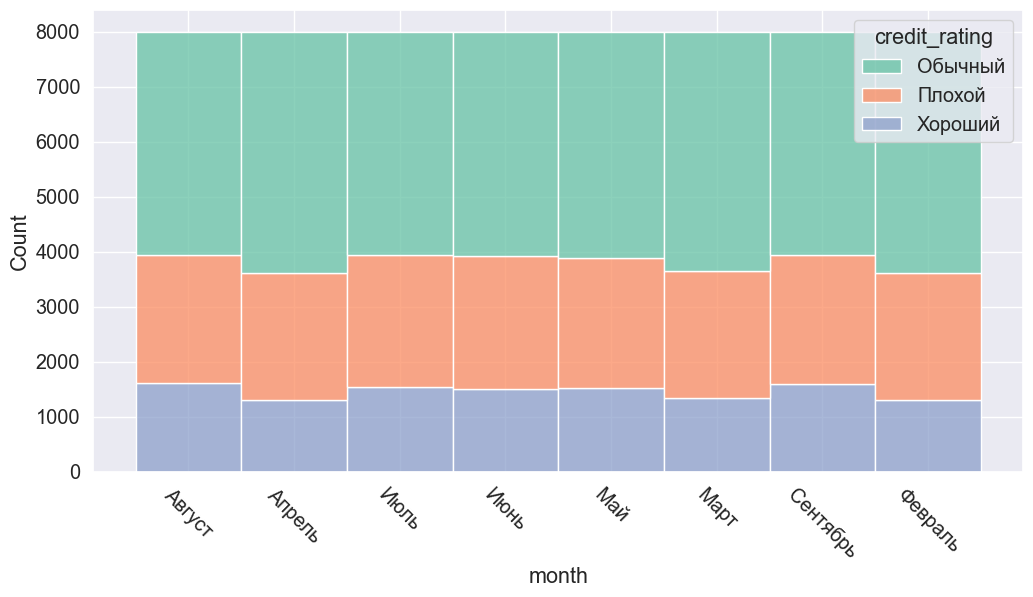

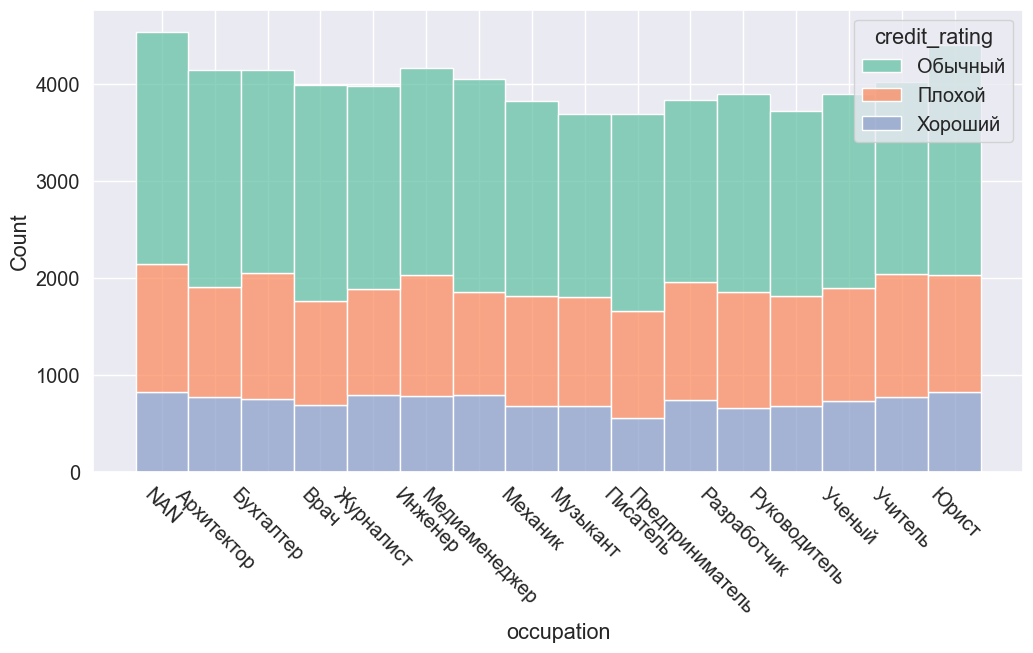

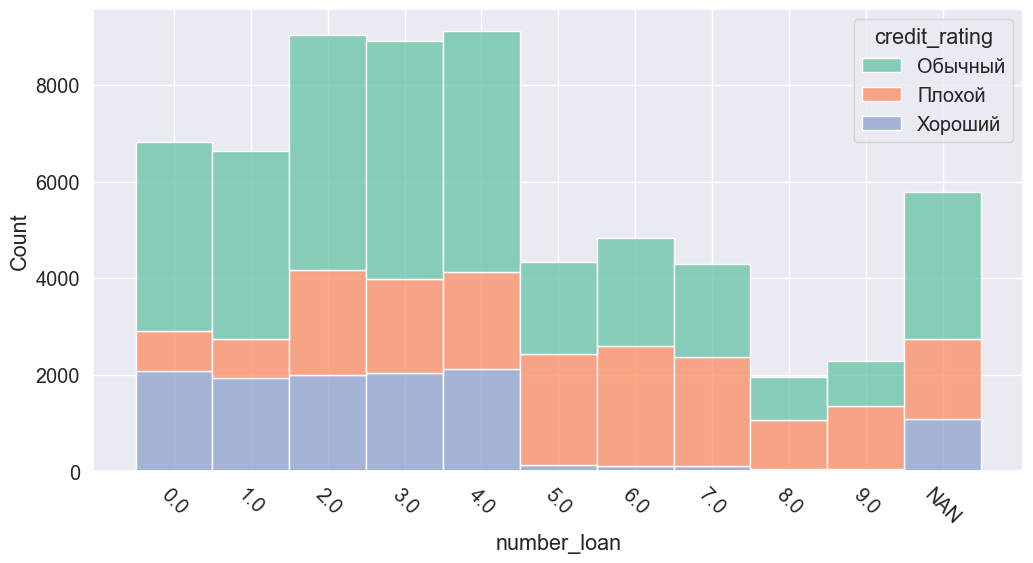

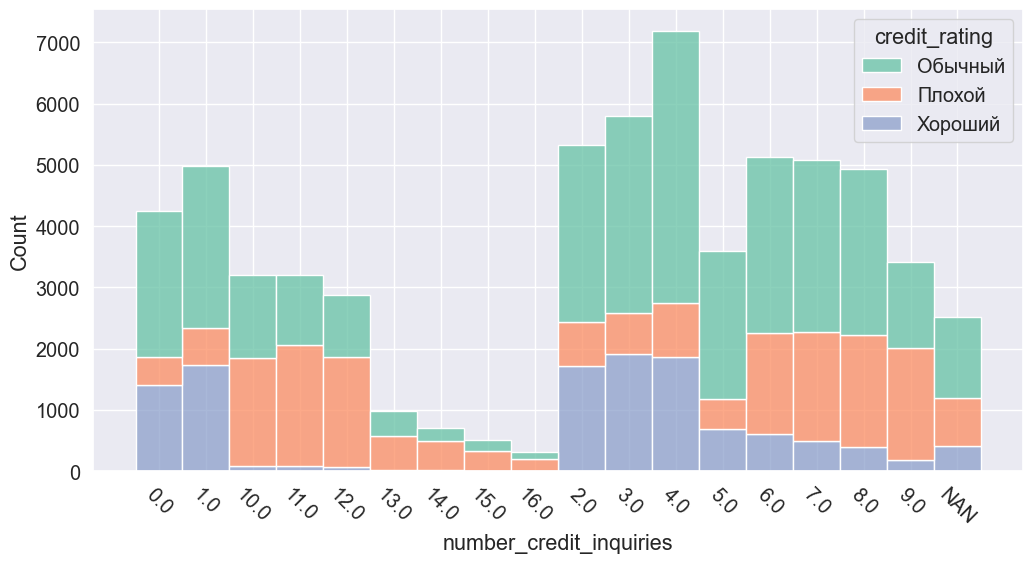

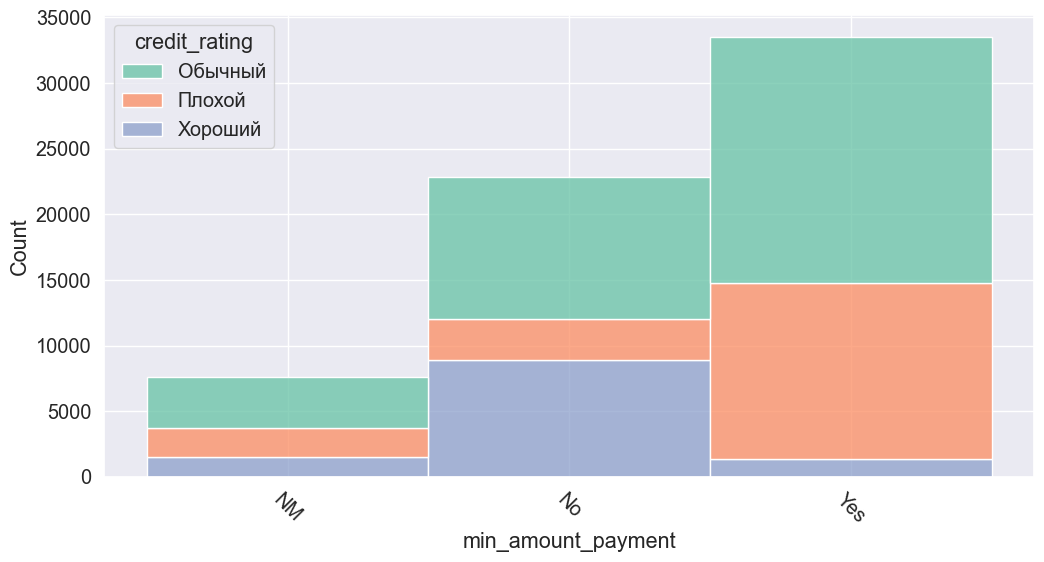

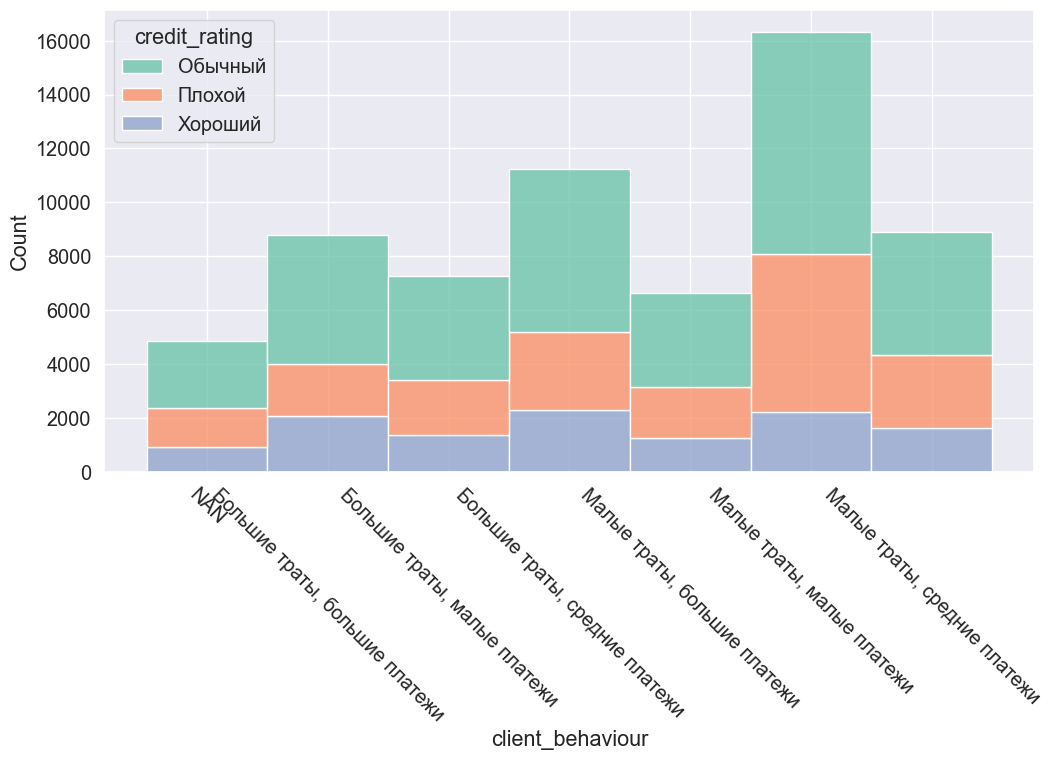

In [7]:
for f in cat_features:
    plt.figure(figsize=(12,6))
    g = pd.DataFrame(df.astype(str).groupby([f,target])[f].count()).rename(columns={f:'cnt'}).reset_index()
    sns.histplot(g, x=f, hue=target, weights='cnt', multiple='stack')
    plt.xticks(rotation=-45)
    plt.show()

In [8]:
# кодировка категорий

# month кодируем порядковым образом
months = {m:i for i,m in enumerate(['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь'])}
df['month'] = df['month'].apply(lambda x: months[x.lower().strip()]).astype(int)

# occupation кодируем 1-hot
df = pd.concat([df, pd.get_dummies(df['occupation'], prefix='occupation')], axis=1)

# number_loan - не кодируем. После обработки остальных фичей можем заменить пропуски предиктом (модой для соседей? лог рег?)  # !!!
# number_credit_inquiries - тоже  # !!!

# min_amount_payment кодируем 1-hot
df = pd.concat([df, pd.get_dummies(df['min_amount_payment'], prefix='min_amount_payment')], axis=1)  # NM\no\yes 1 столбец? но что такое NM? 

# client_behaviour - разбить на два признака (траты + платежи), порядковый энкодинг
df['траты'] = df['client_behaviour'].apply(lambda x: 'NAN' if x=='NAN' else (x.split()[0]=='Большие'))
df['платежи'] = df['client_behaviour'].apply(lambda x: 'NAN' if x=='NAN' else {'малые':0,'средние':1,'большие':2}[x.split()[2]])

df.drop(['occupation','min_amount_payment','client_behaviour'], axis=1, inplace=True)
for f in ['occupation','min_amount_payment','client_behaviour']:
    cat_features.remove(f)
cat_features.extend([col for col in df.columns if col.startswith('occupation')])
cat_features.extend([col for col in df.columns if col.startswith('min_amount_payment')])
cat_features.extend(['траты','платежи'])

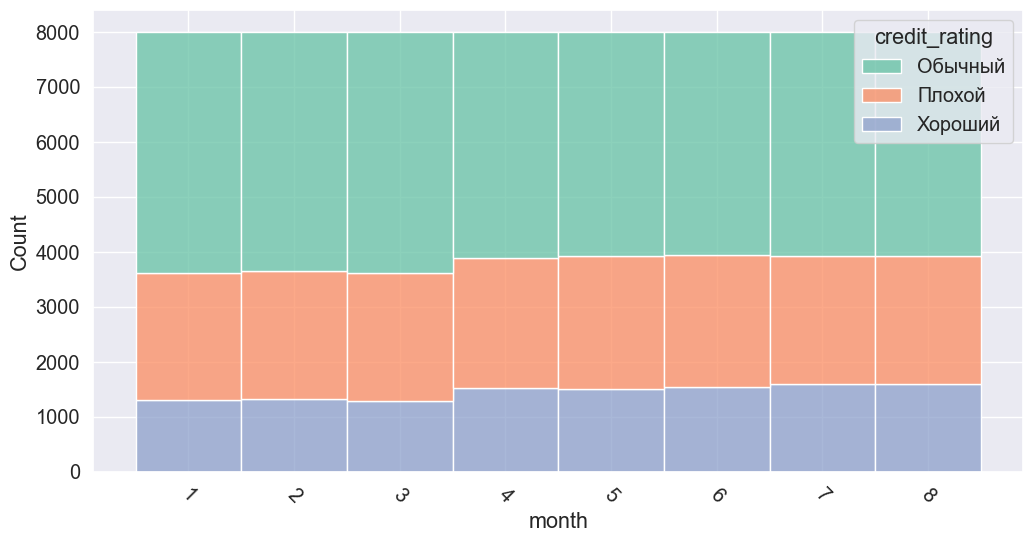

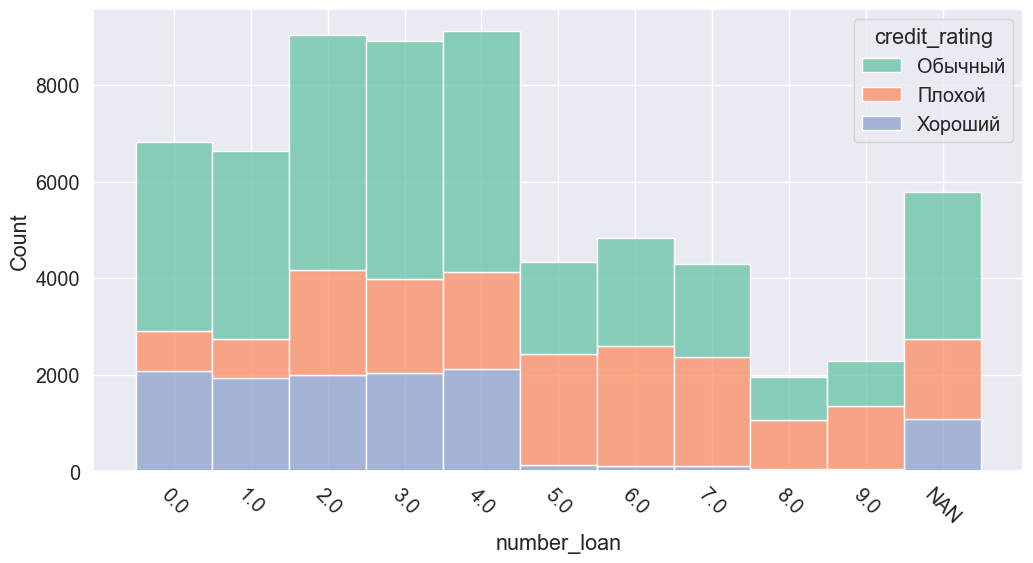

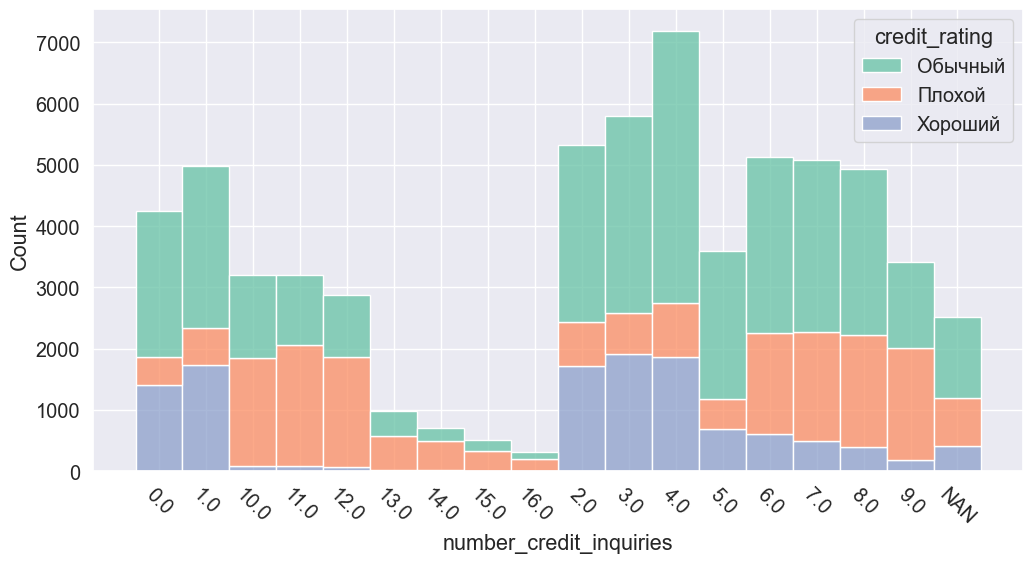

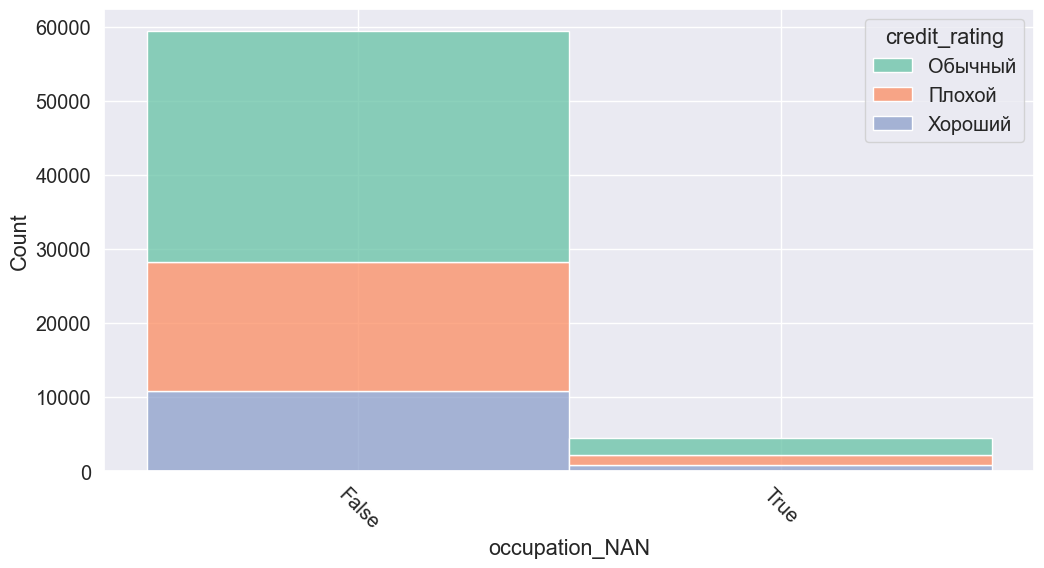

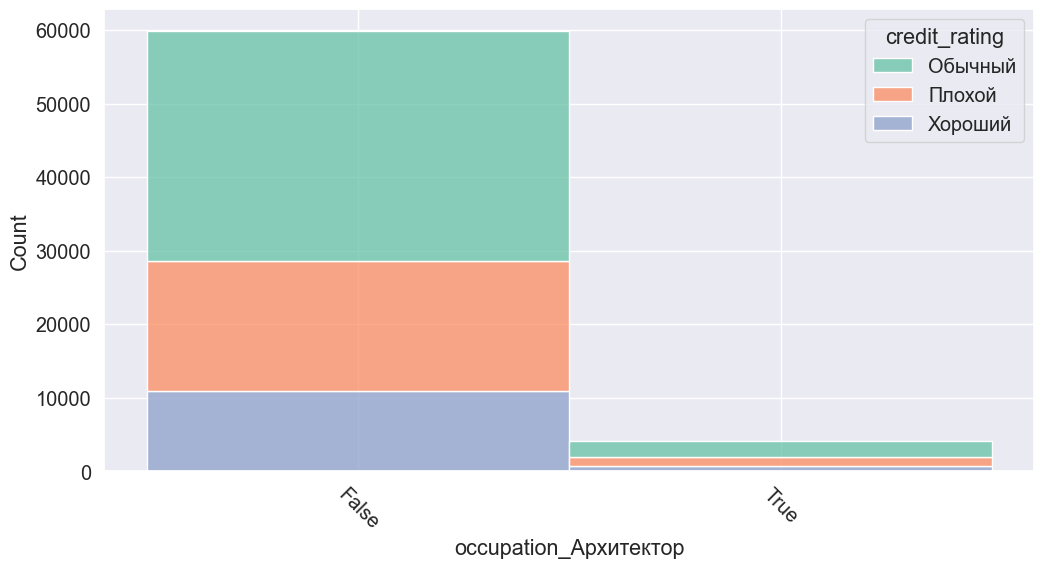

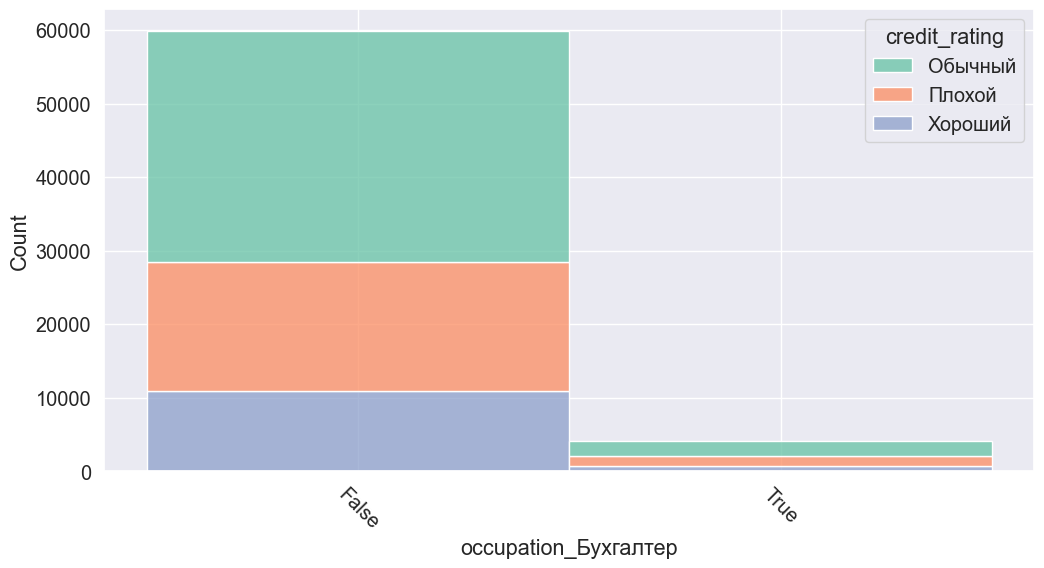

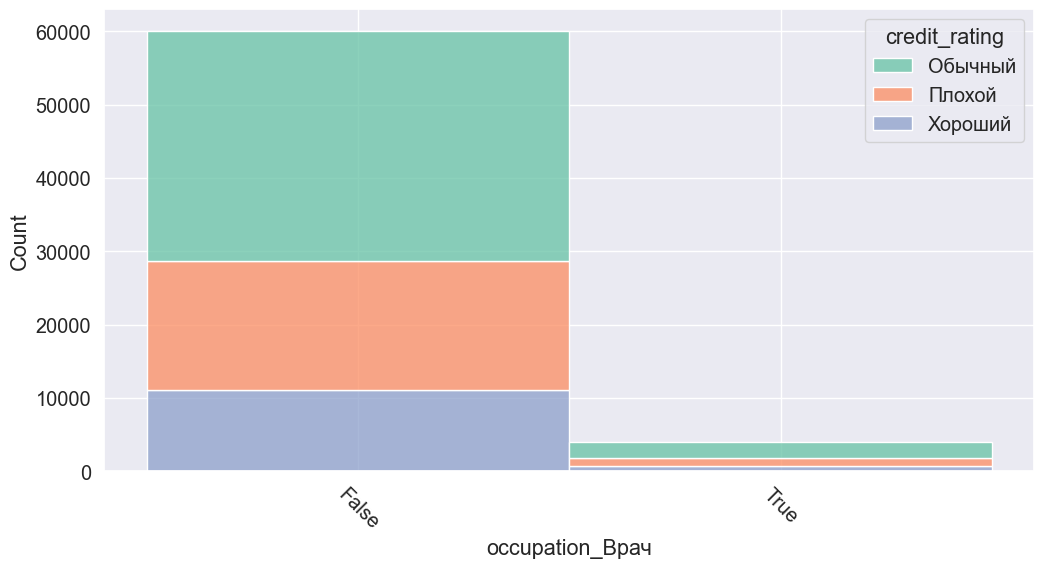

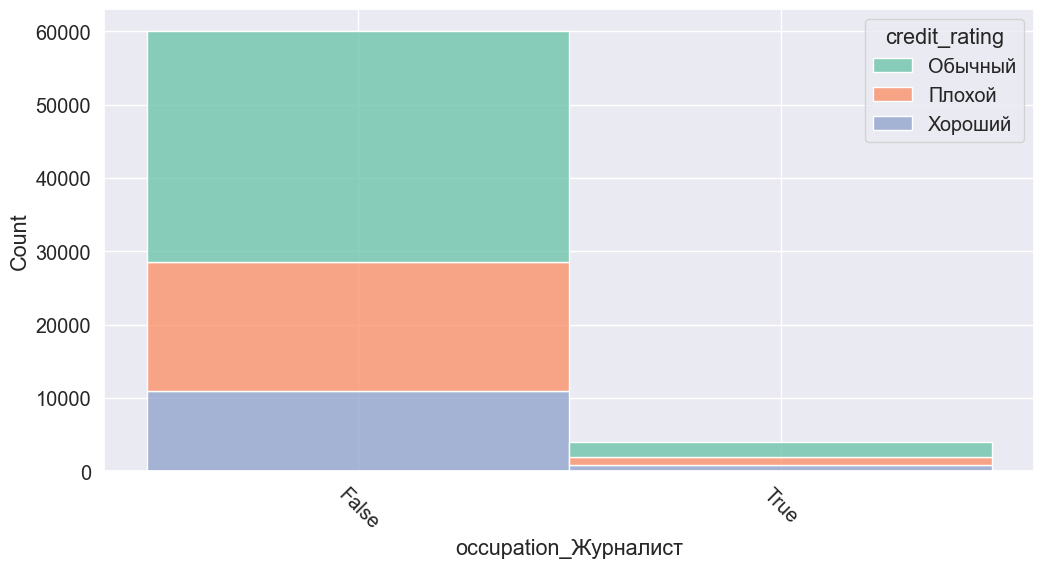

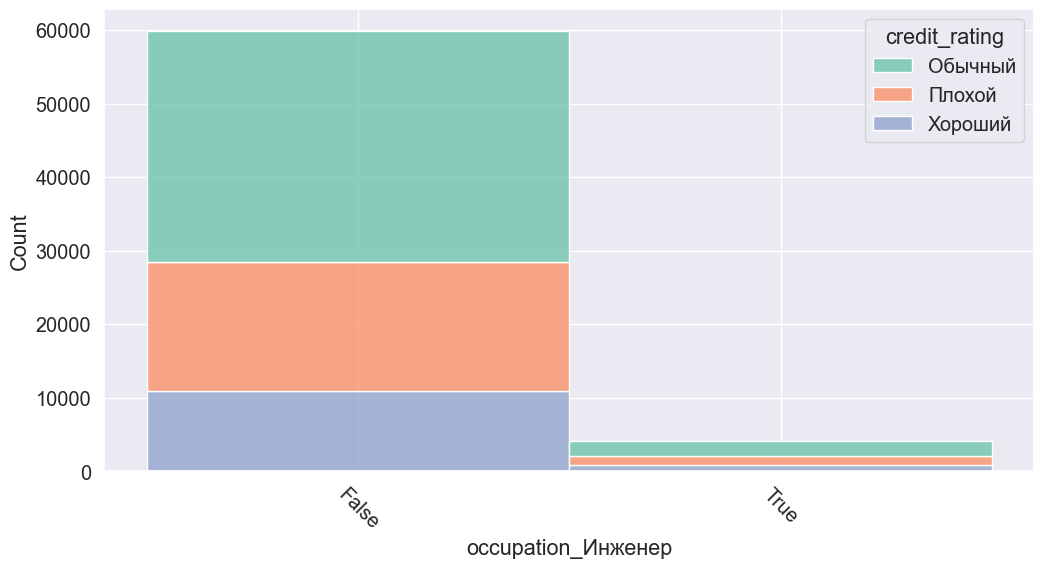

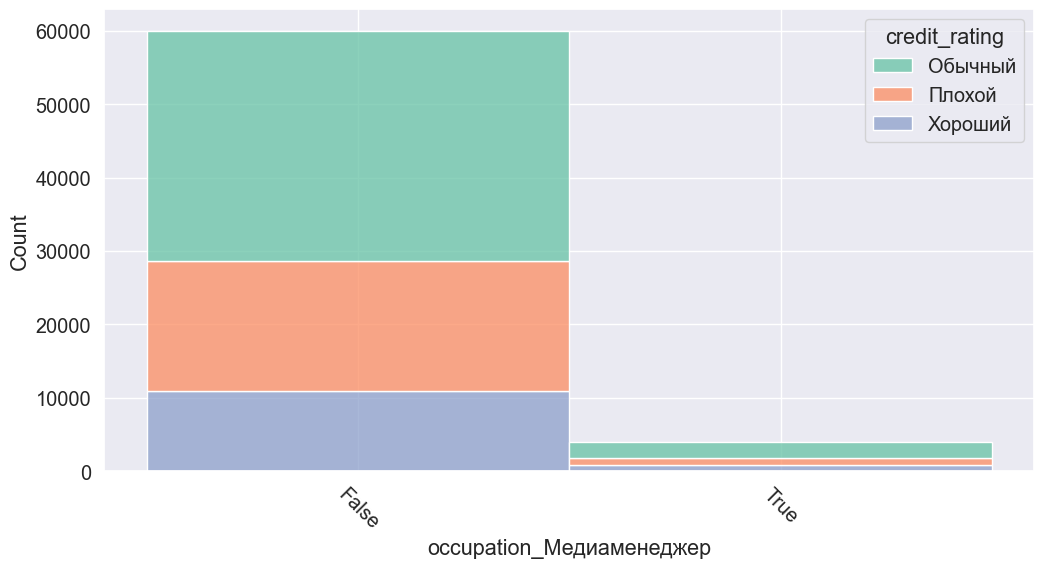

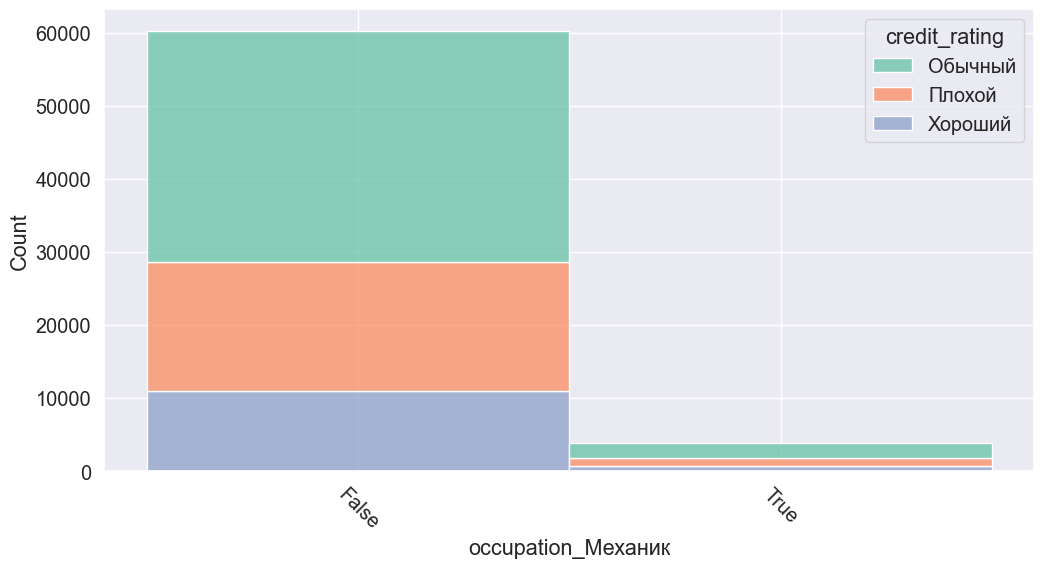

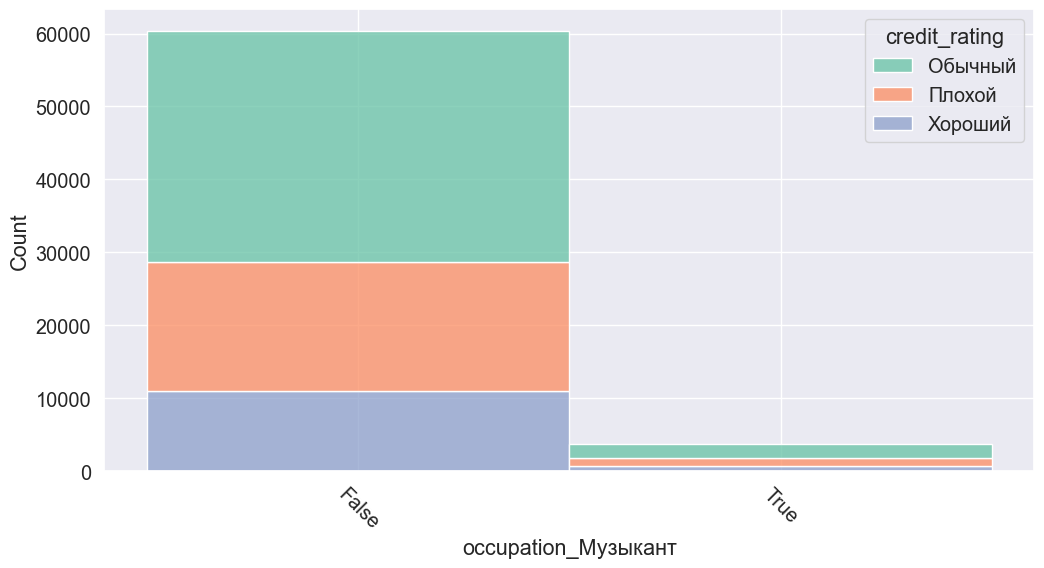

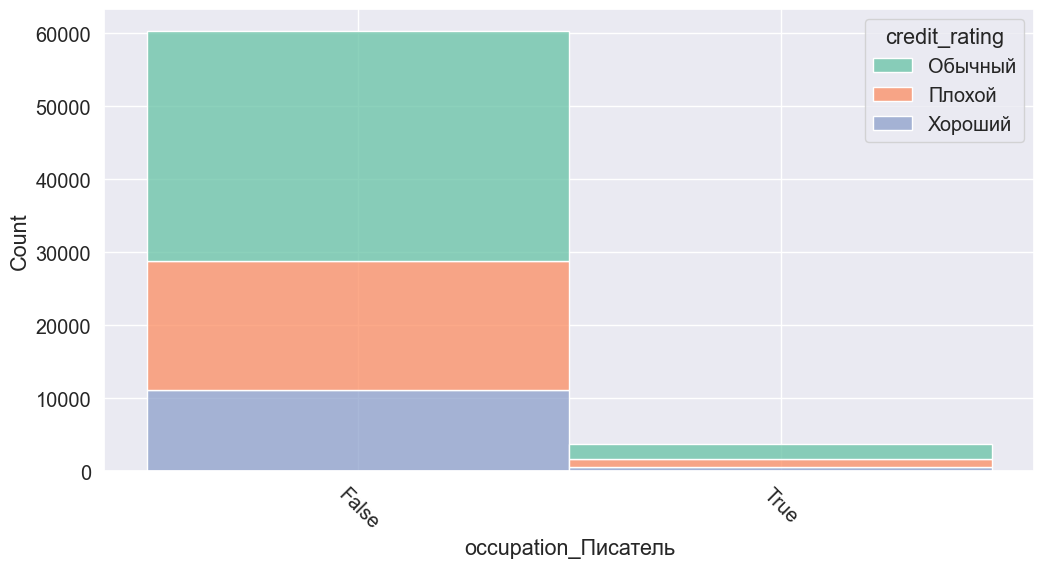

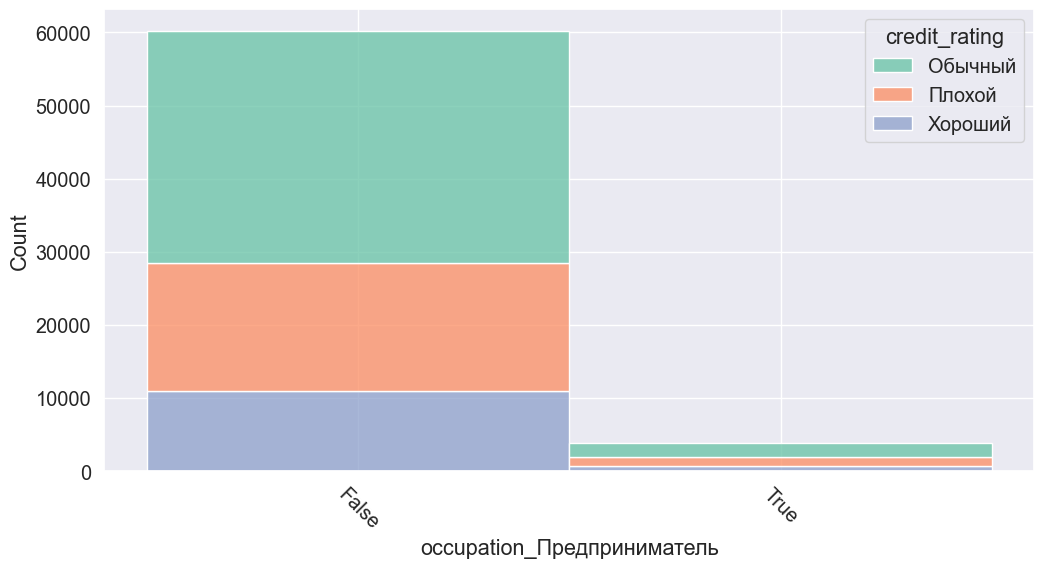

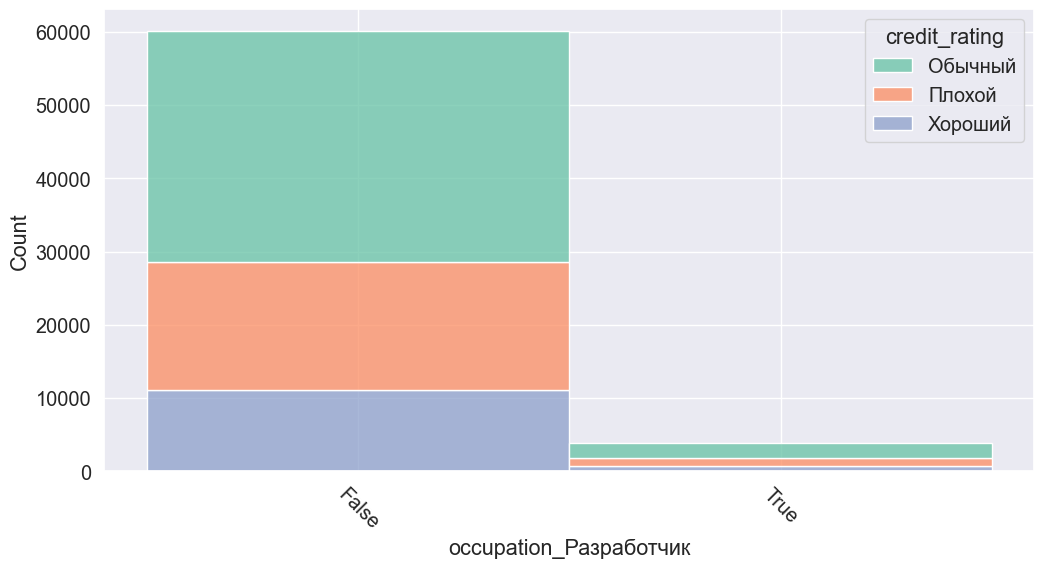

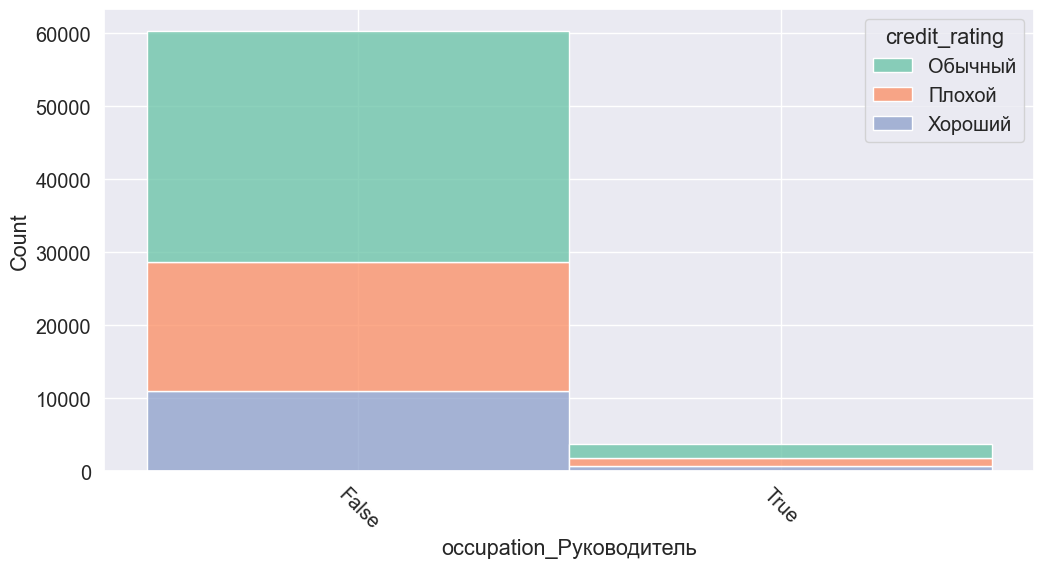

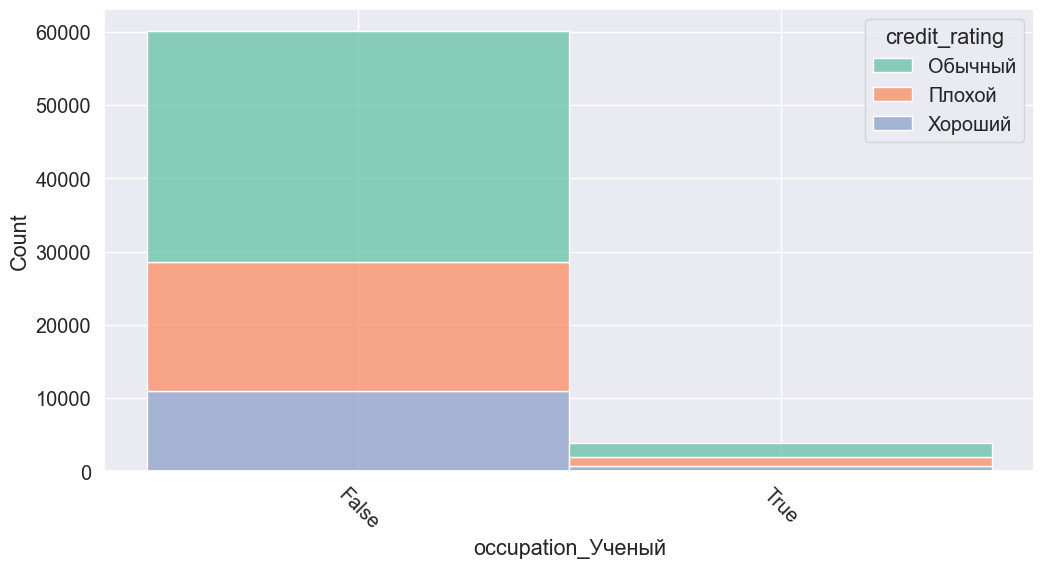

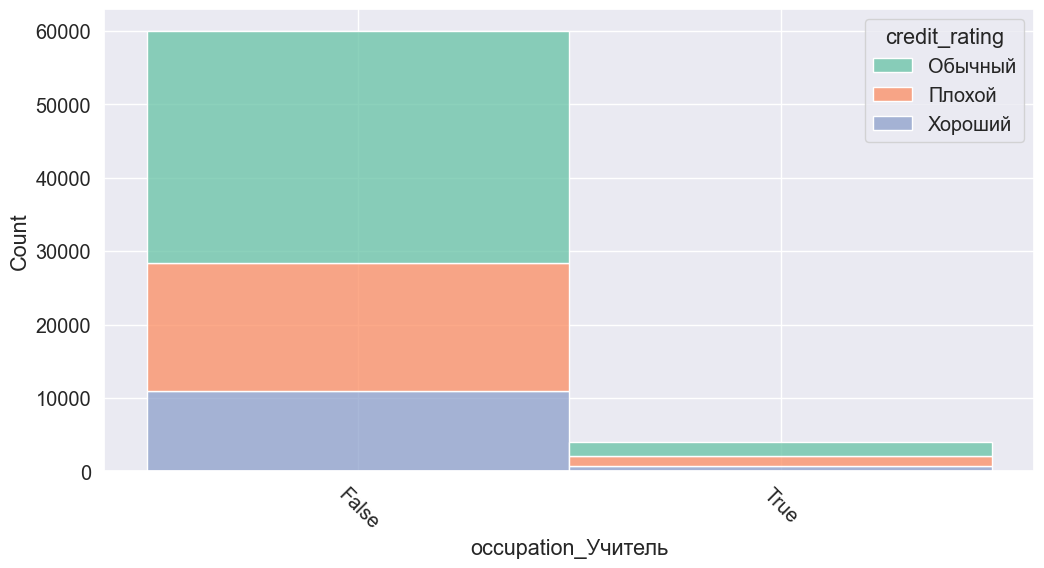

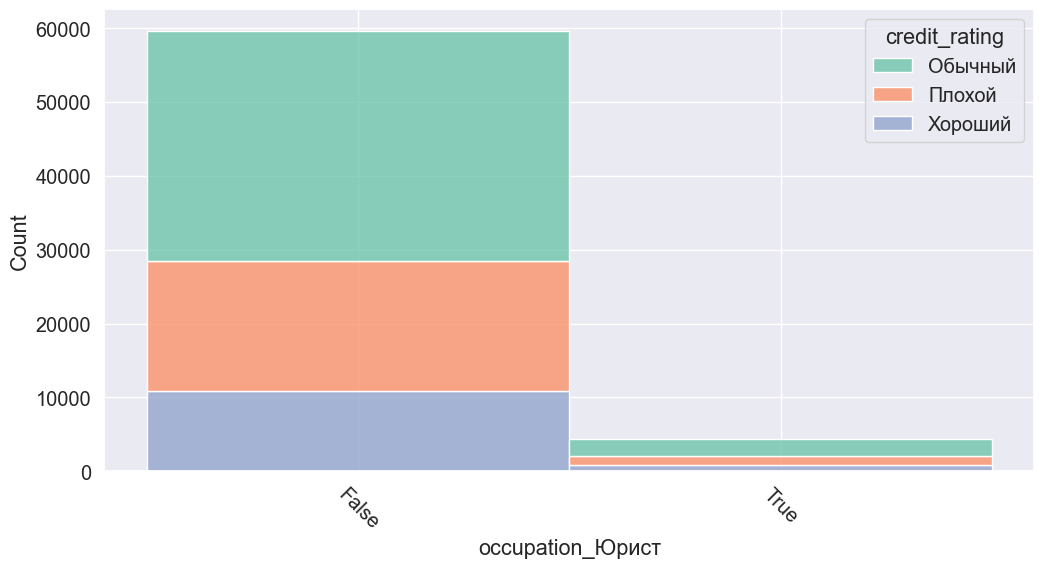

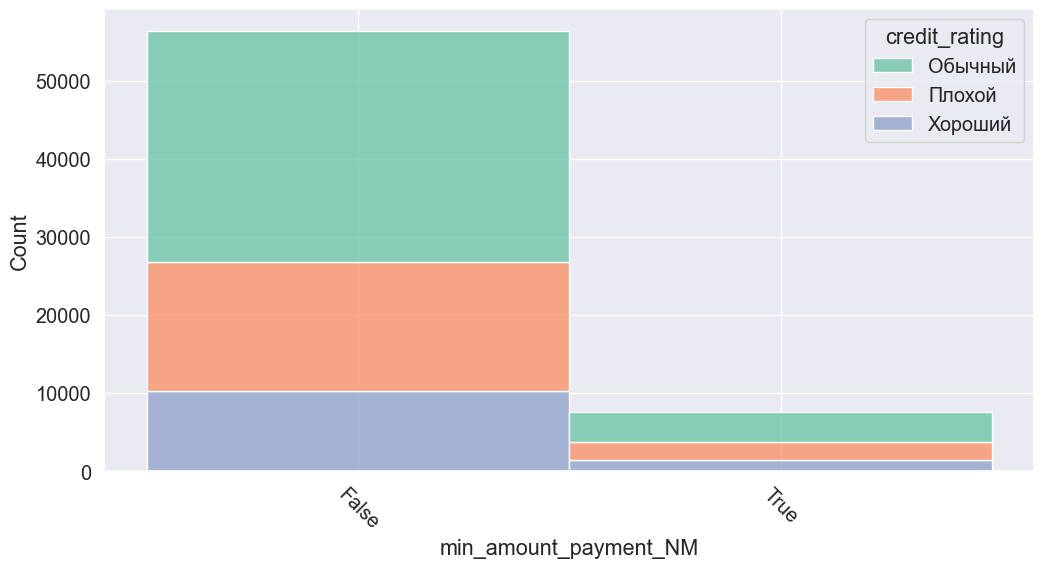

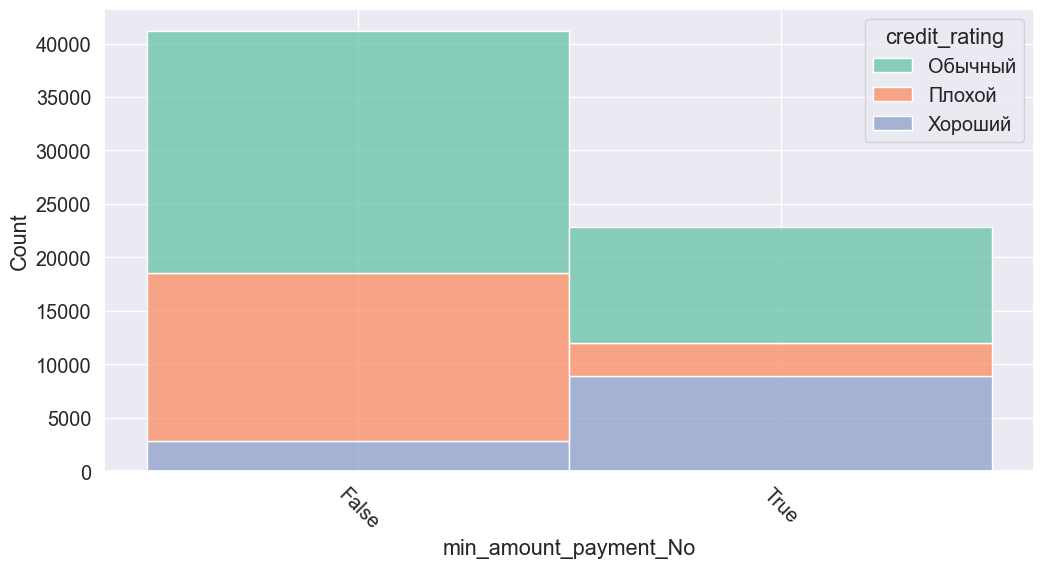

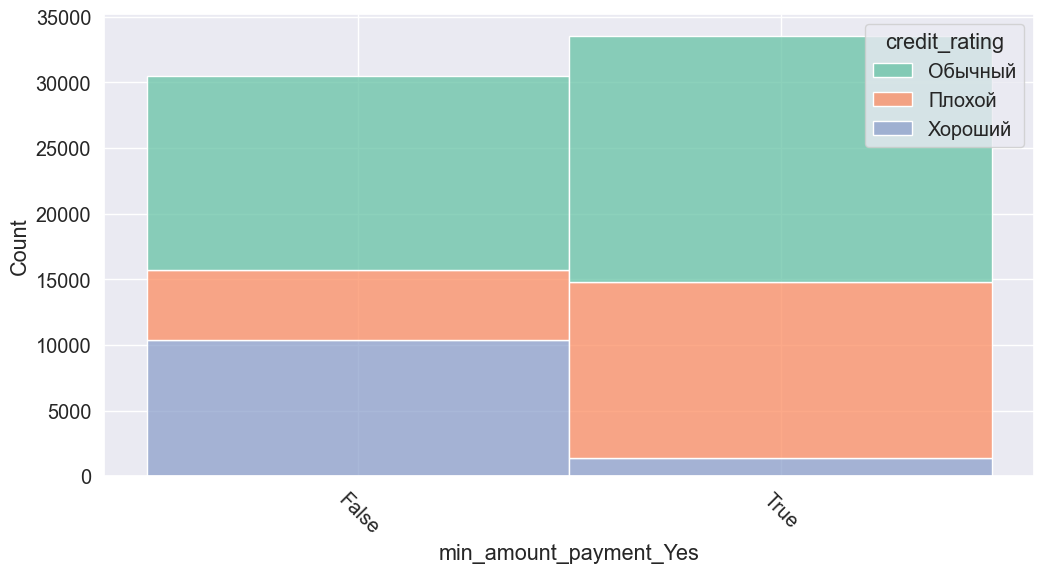

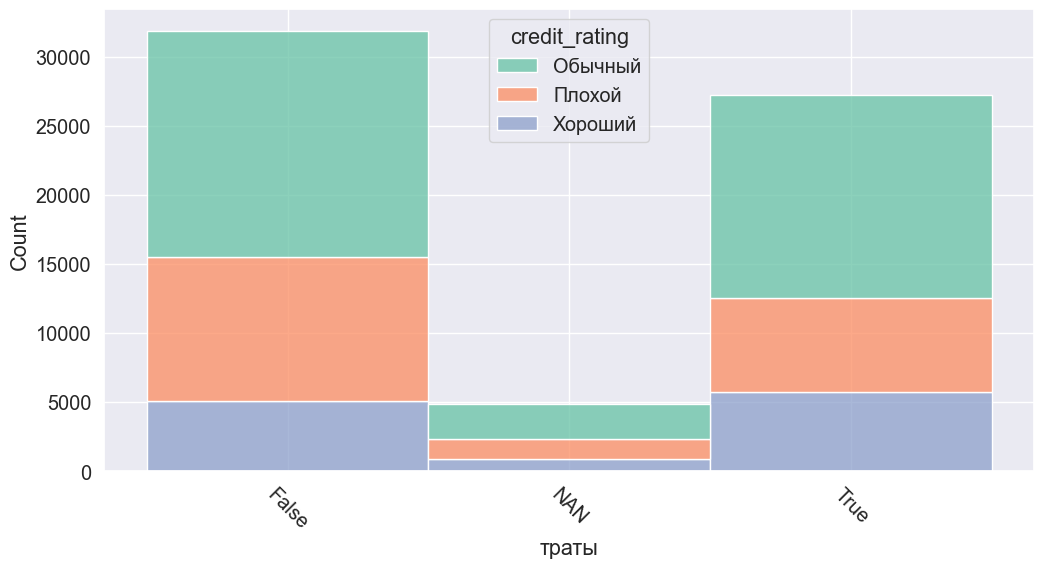

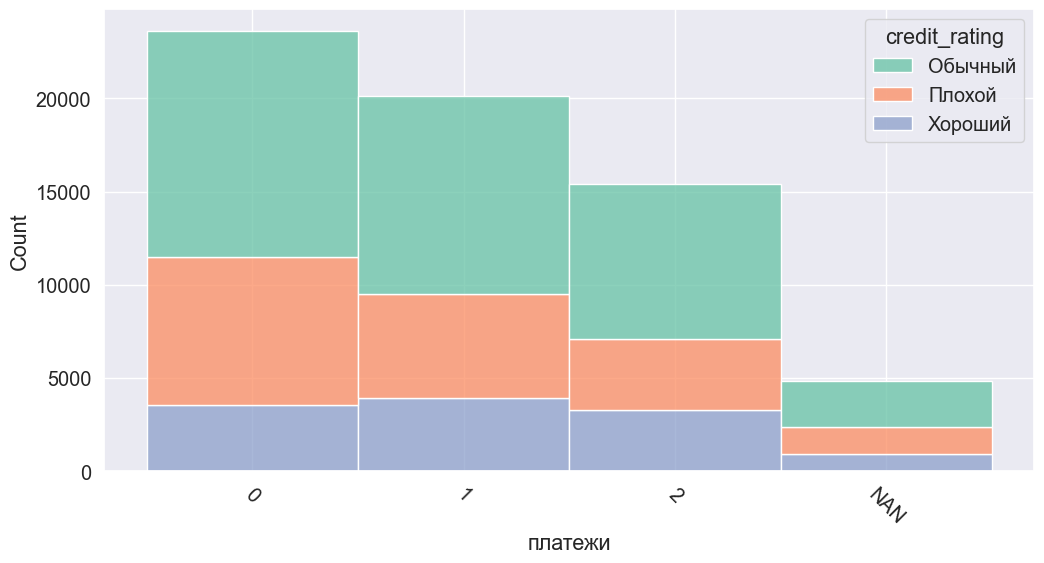

In [9]:
for f in cat_features:
    plt.figure(figsize=(12,6))
    g = pd.DataFrame(df.astype(str).groupby([f,target])[f].count()).rename(columns={f:'cnt'}).reset_index()
    sns.histplot(g, x=f, hue=target, weights='cnt', multiple='stack')
    plt.xticks(rotation=-45)
    plt.show()

In [10]:
df.replace({'NAN':np.nan}, inplace=True)  # 'NAN' был нужен для удобства визуализации, вернем

client_id

In [11]:
# client_id кажется чисто техническим, НО с его помощью можно заполнить пропуски
g = df.groupby('client_id').agg(lambda x: x.isna().sum())
print(g.shape)  # 8000 уникальных клиентов, 
print(df.client_id.value_counts().min(), df.client_id.value_counts().max())  # от каждого доступно ровно по 8 записей
g.head(3)

(8000, 38)
8 8


,month,age,annual_income,monthly_salary,number_bank_accounts,number_credit_cards,interest_rate,number_loan,delay_from_due_date,number_delayed_payment,...,occupation_Разработчик,occupation_Руководитель,occupation_Ученый,occupation_Учитель,occupation_Юрист,min_amount_payment_NM,min_amount_payment_No,min_amount_payment_Yes,траты,платежи
client_id,,,,,,,,,,,,,,,,,,,,,
0016d1b737,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
001e73ed67,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,2
00288c4dc1,0,0,1,3,0,0,0,1,0,4,...,0,0,0,0,0,0,0,0,2,2


In [12]:
df[df.client_id=='00288c4dc1']

,client_id,month,age,annual_income,monthly_salary,number_bank_accounts,number_credit_cards,interest_rate,number_loan,delay_from_due_date,...,occupation_Разработчик,occupation_Руководитель,occupation_Ученый,occupation_Учитель,occupation_Юрист,min_amount_payment_NM,min_amount_payment_No,min_amount_payment_Yes,траты,платежи
7232,00288c4dc1,1,36.0,72963.03,NaN,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0
7233,00288c4dc1,2,36.0,73151.89,NaN,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,0.0
7234,00288c4dc1,3,36.0,72662.45,5951.275,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,False,2.0
7235,00288c4dc1,4,36.0,73353.95,5909.255,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0
7236,00288c4dc1,5,36.0,NaN,5917.435,5,5,10.0,NaN,5,...,False,False,False,False,False,False,True,False,NaN,NaN
7237,00288c4dc1,6,36.0,72850.87,5948.365,5,5,10.0,3.0,5,...,False,False,False,False,False,True,False,False,True,1.0
7238,00288c4dc1,7,36.0,73105.81,NaN,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0
7239,00288c4dc1,8,37.0,72817.13,5866.435,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,NaN,NaN


In [13]:
print(df.isna().sum().sum(), end=' -> ')

g_num = df.groupby('client_id')[num_features].mean()
for f in num_features:
    df[f].fillna(df['client_id'].apply(lambda x: g_num[f].loc[x]), inplace=True)

g_cat = df.groupby('client_id')[cat_features].agg(lambda x: x.value_counts().index[0])   #.agg(pd.Series.mode)
for f in cat_features:
    df[f].fillna(df['client_id'].apply(lambda x: g_cat[f].loc[x]), inplace=True)

print(df.isna().sum().sum())

59232 -> 992


In [14]:
df[df.client_id=='00288c4dc1']

,client_id,month,age,annual_income,monthly_salary,number_bank_accounts,number_credit_cards,interest_rate,number_loan,delay_from_due_date,...,occupation_Разработчик,occupation_Руководитель,occupation_Ученый,occupation_Учитель,occupation_Юрист,min_amount_payment_NM,min_amount_payment_No,min_amount_payment_Yes,траты,платежи
7232,00288c4dc1,1,36.0,72963.030000,5918.553,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0
7233,00288c4dc1,2,36.0,73151.890000,5918.553,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,0.0
7234,00288c4dc1,3,36.0,72662.450000,5951.275,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,False,2.0
7235,00288c4dc1,4,36.0,73353.950000,5909.255,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0
7236,00288c4dc1,5,36.0,72986.447143,5917.435,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0
7237,00288c4dc1,6,36.0,72850.870000,5948.365,5,5,10.0,3.0,5,...,False,False,False,False,False,True,False,False,True,1.0
7238,00288c4dc1,7,36.0,73105.810000,5918.553,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0
7239,00288c4dc1,8,37.0,72817.130000,5866.435,5,5,10.0,3.0,5,...,False,False,False,False,False,False,True,False,True,1.0


In [15]:
df.isna().sum()  # остались только в interest_rate

client_id                       0
month                           0
age                             0
annual_income                   0
monthly_salary                  0
number_bank_accounts            0
number_credit_cards             0
interest_rate                 992
number_loan                     0
delay_from_due_date             0
number_delayed_payment          0
number_credit_inquiries         0
unpaid_debt                     0
credit_utilization_ratio        0
credit_history_age              0
monthy_amount_invested          0
monthly_balance                 0
credit_rating                   0
occupation_NAN                  0
occupation_Архитектор           0
occupation_Бухгалтер            0
occupation_Врач                 0
occupation_Журналист            0
occupation_Инженер              0
occupation_Медиаменеджер        0
occupation_Механик              0
occupation_Музыкант             0
occupation_Писатель             0
occupation_Предприниматель      0
occupation_Раз

num_features

In [16]:
# за кадром стало понятно, что часть признаков распределены логнормально, а в части можно удалить очевидные выбросы
print(len(df), end=' -> ')
df = df[df.age < 60]
print(len(df))

print(len(df), end=' -> ')
# df.annual_income = np.log(df.annual_income)
df = df[df.annual_income < 0.3e6]
print(len(df))

# print(len(df), end=' -> ')
# # df.monthly_salary = np.log(df.monthly_salary)
# df = df[df.monthly_salary < ...]
# print(len(df))

# print(len(df), end=' -> ')
# # df.monthly_balance = np.log(df.monthly_balance)
# df = df[df.monthly_balance < ...]
# print(len(df))

print(len(df), end=' -> ')
# df.number_bank_accounts = np.log(df.number_bank_accounts)
df = df[df.number_bank_accounts < 100]  # значения выше кажутся уж слишком странными, но даже 100 уже оч много
print(len(df))

print(len(df), end=' -> ')
# df.number_credit_cards = np.log(df.number_credit_cards)
df = df[df.number_credit_cards < 100]  # значения выше кажутся уж слишком странными, но даже 100 уже оч много
print(len(df))

print(len(df), end=' -> ')
df = df[df.monthy_amount_invested != 0]  # около 100 выбросов, которые еще и ломают логарифм
df.monthy_amount_invested = np.log(df.monthy_amount_invested)
print(len(df))

64000 -> 63995
63995 -> 63066
63066 -> 62271
62271 -> 60920
60920 -> 60818


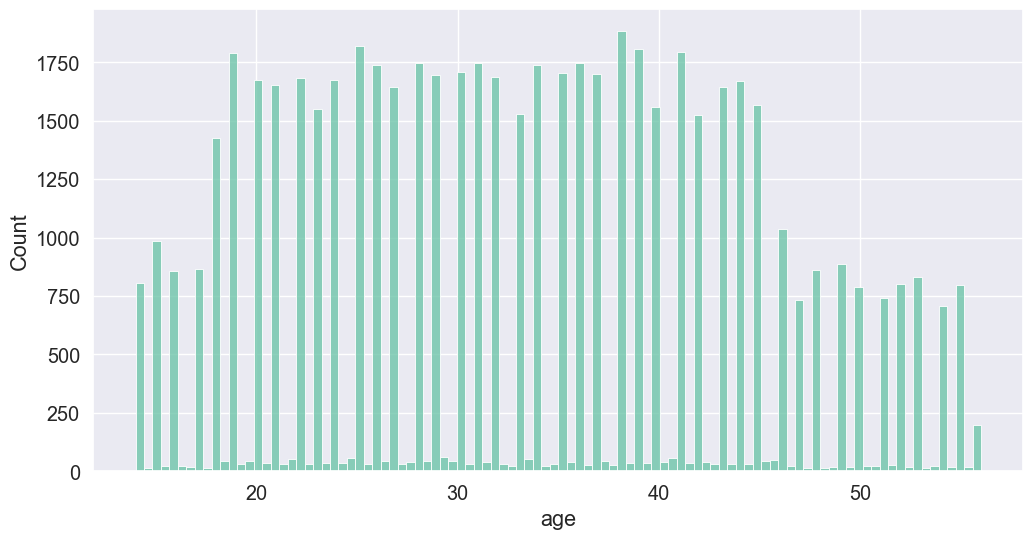

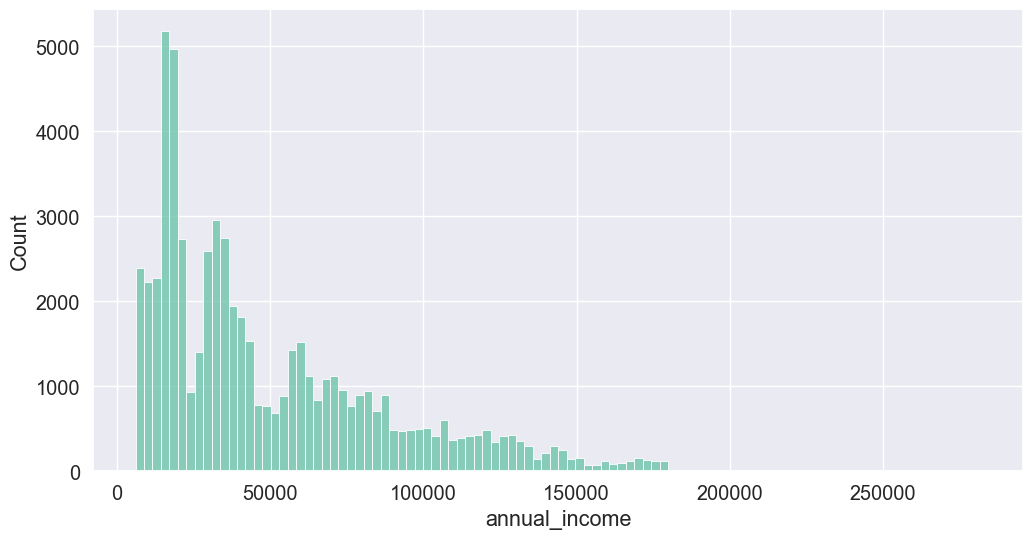

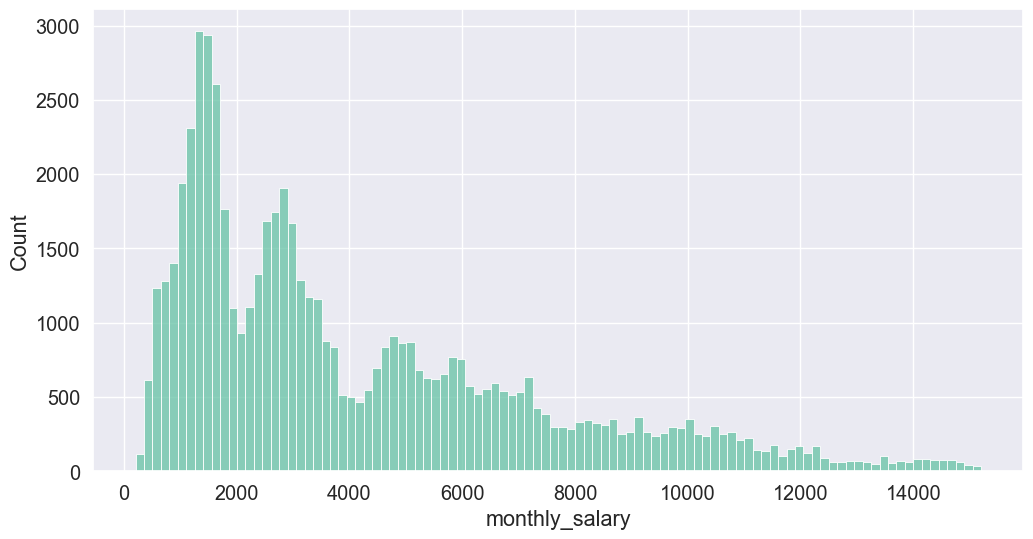

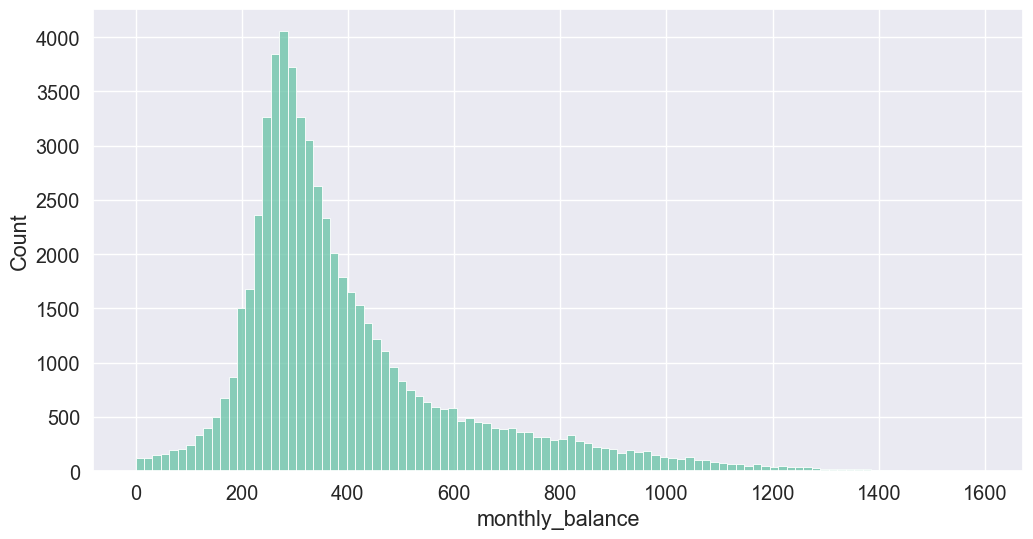

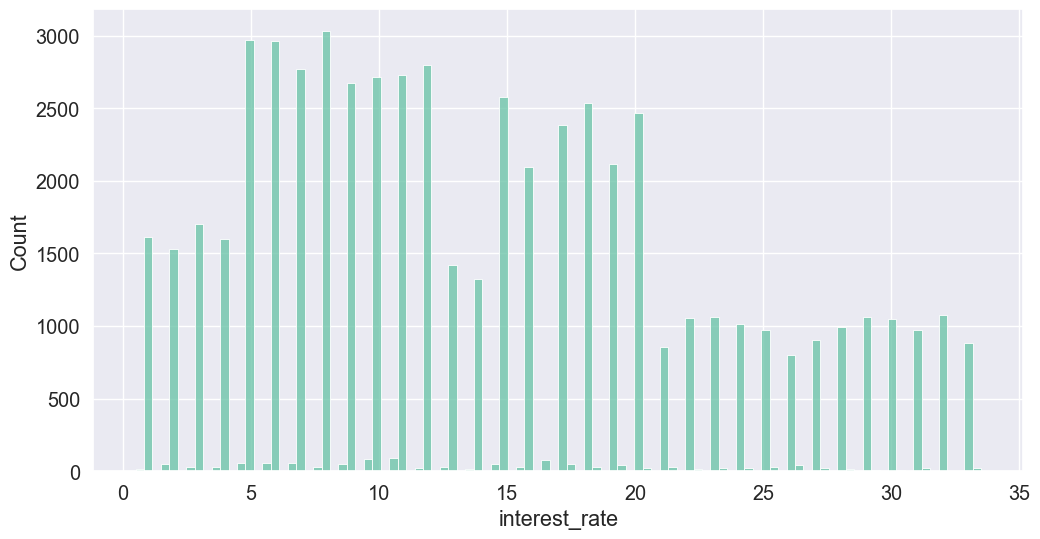

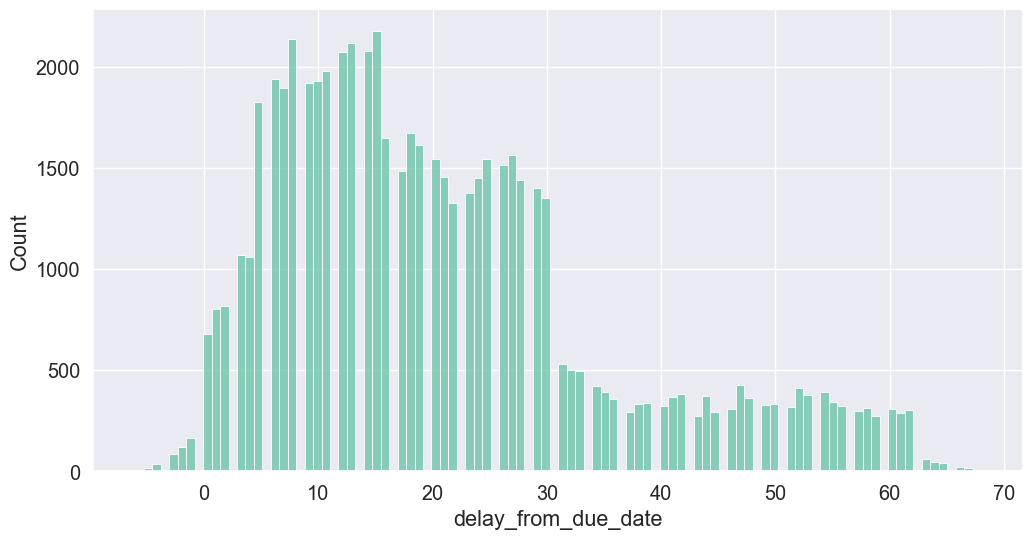

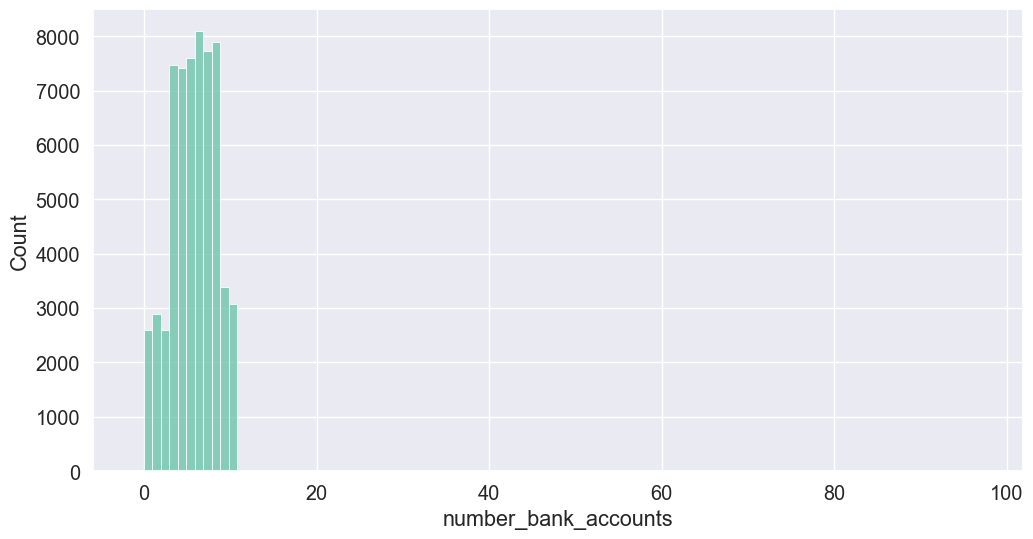

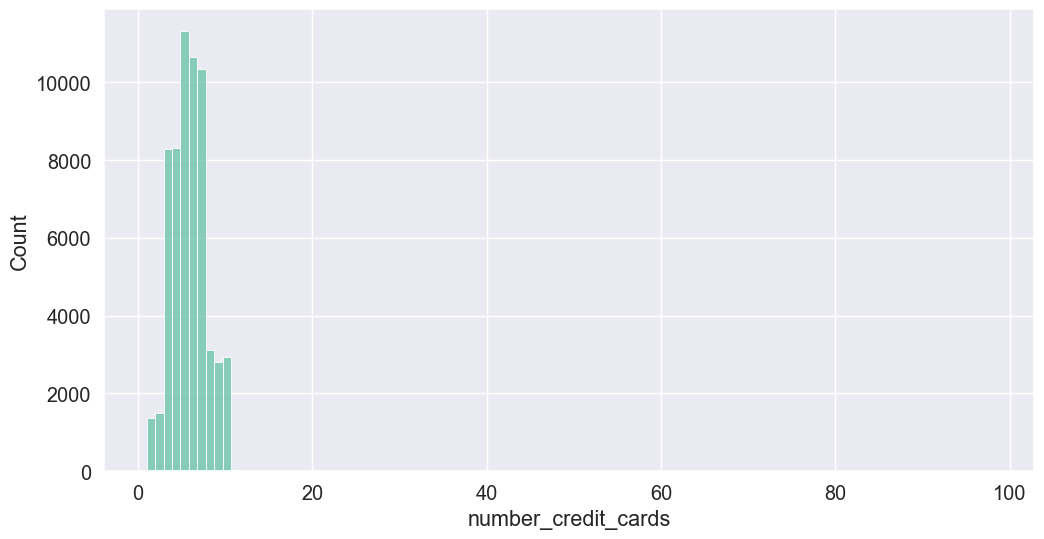

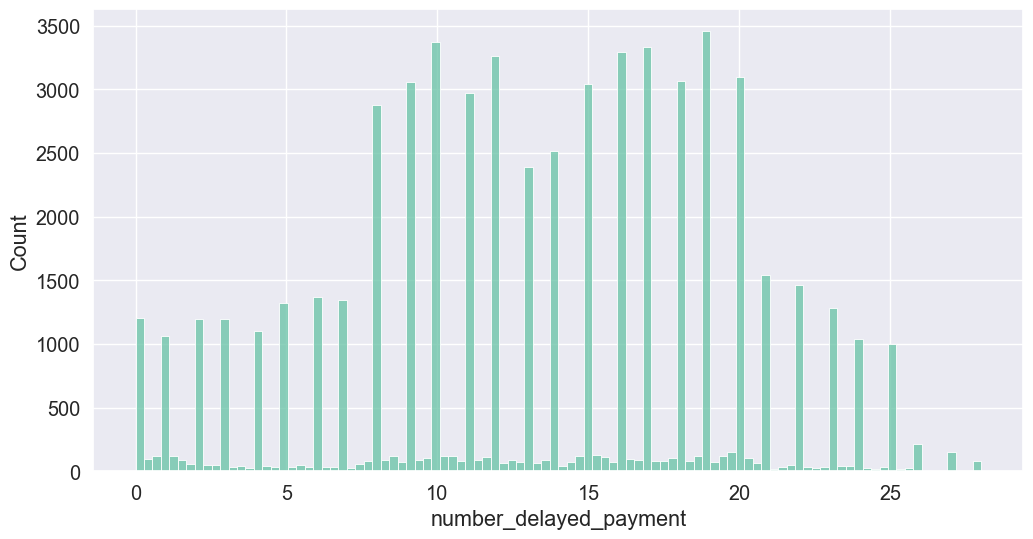

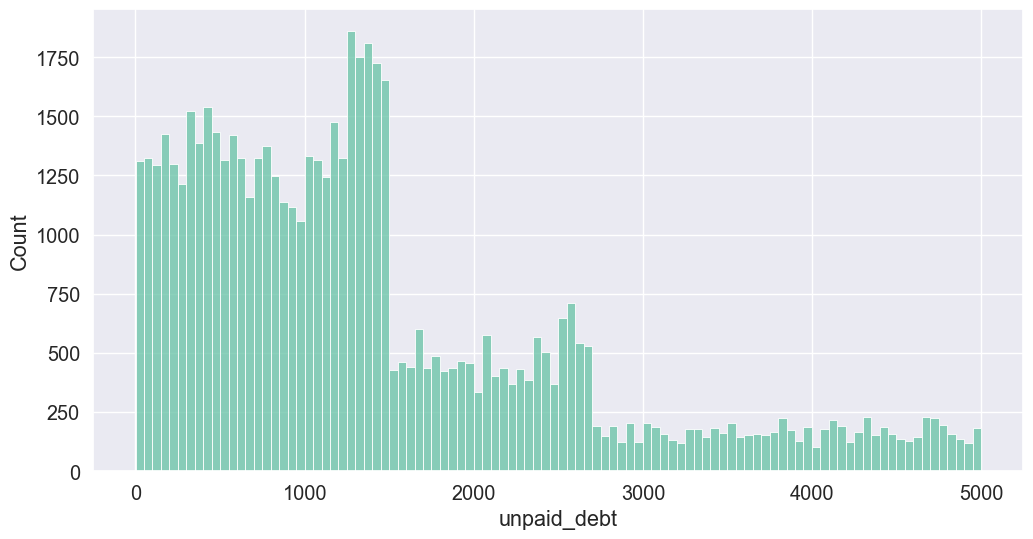

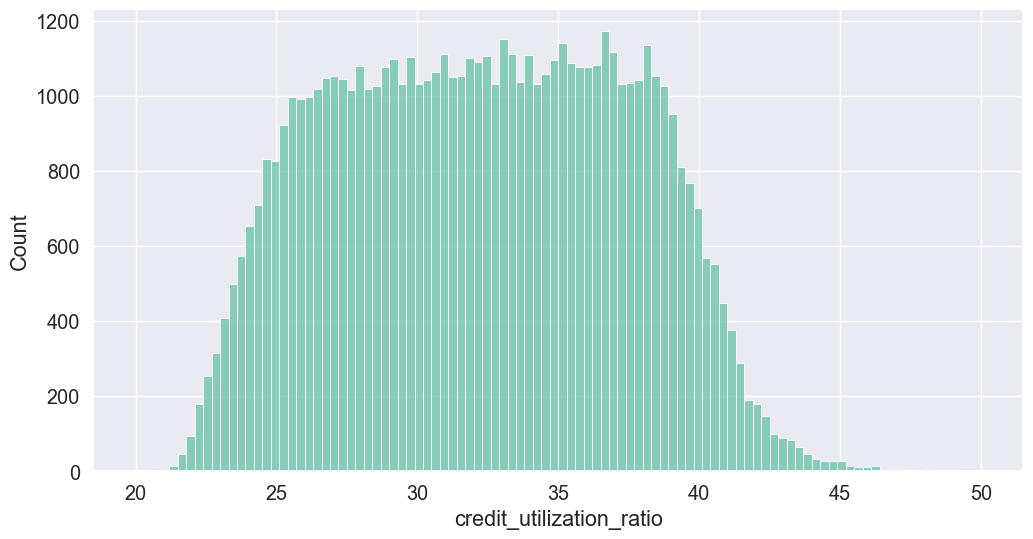

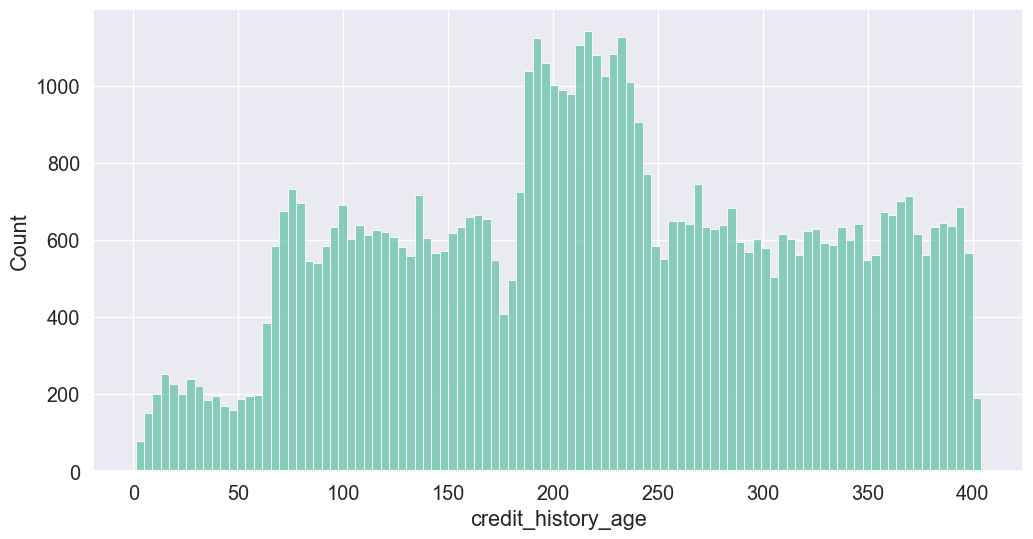

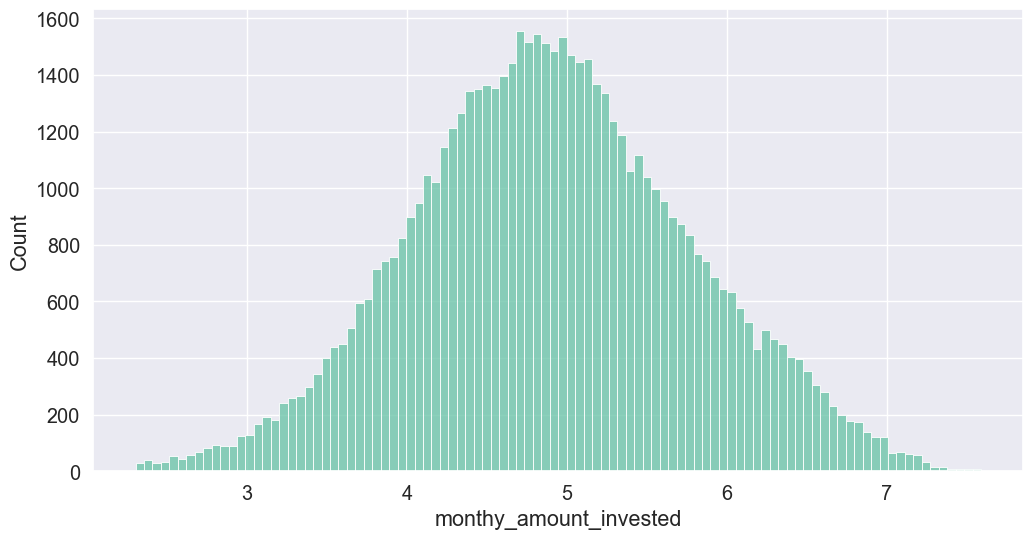

In [17]:
for f in num_features:
    plt.figure(figsize=(12,6))
    sns.histplot(df[f].astype(float), bins=100)
    plt.show()

In [18]:
# по-настоящему нормальное распределение имеет лишь log(исходного df.monthy_amount_invested). Отсечем выбросы методом 3 сигм
num = 3
L,R = df.monthy_amount_invested.mean() - num*df.monthy_amount_invested.std(), df.monthy_amount_invested.mean() + num*df.monthy_amount_invested.std()

print(len(df), end=' -> ')
df = df[(df.monthy_amount_invested>=L) & (df.monthy_amount_invested<=R)]
print(len(df))

60818 -> 60809


In [19]:
# осталось заполнить пропуски в interest_rate
print(df.isna().sum().sum(), df.isna().sum()['interest_rate'])
df.interest_rate.fillna(df.interest_rate.median(), inplace=True)
print(df.isna().sum().sum())

937 937
0


target

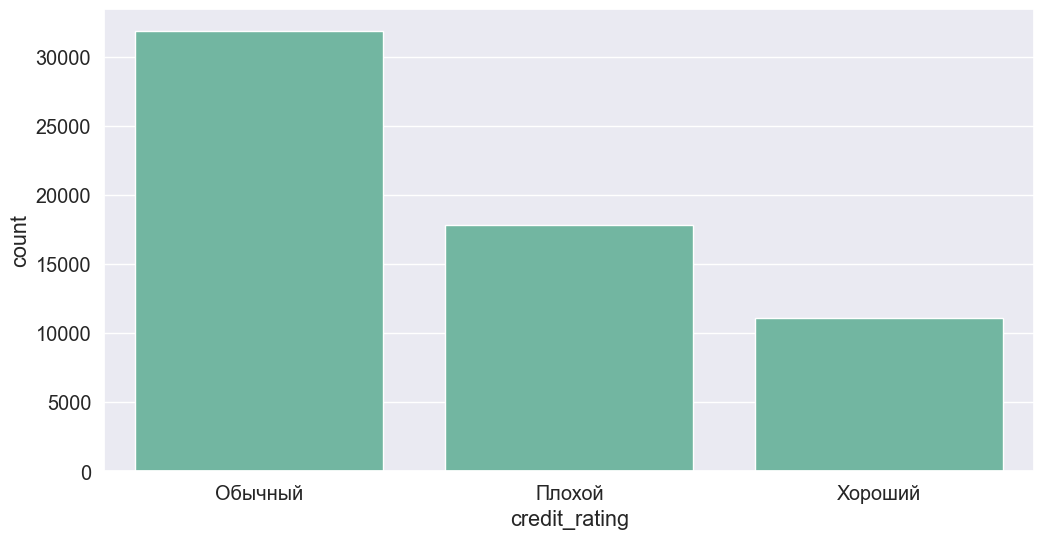

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(df[target].value_counts())
plt.show()

In [21]:
rating = {'Плохой':0, 'Обычный':1, 'Хороший':2}
df.credit_rating = df.credit_rating.apply(lambda x: rating[x])  # порядковое кодирование

features = num_features + cat_features  # без client_id и target

##### Обучение, подбор гиперпараметров по валидации

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)  # лик по клиентам

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [24]:
search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    n_iter=50,
    param_distributions={
        'n_estimators' : np.arange(10,2000),
        'max_depth' : np.arange(1,20),
    },
    scoring='accuracy',
    n_jobs=1,
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    error_score='raise',
    random_state=42
).fit(X_train, y_train)

print("Лучшие гиперпараметры:")
for k,v in search.best_params_.items():
    print(f'{k}: {v:.4f}')

best_xgb = search.best_estimator_
best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)
Acc(y_test, y_pred_best_xgb)

Лучшие гиперпараметры:
n_estimators: 110.0000
max_depth: 19.0000


0.802910705476073

In [25]:
search = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42, verbose=-1),
    n_iter=100,
    param_distributions={
        'n_estimators' : np.arange(10,2000),
        'max_depth' : np.arange(1,20),
    },
    scoring='accuracy',
    n_jobs=1,
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    error_score='raise',
    random_state=42
).fit(X_train, y_train)

print("Лучшие гиперпараметры:")
for k,v in search.best_params_.items():
    print(f'{k}: {v:.4f}')

best_gbm = search.best_estimator_
best_gbm.fit(X_train, y_train)
y_pred_best_gbm = best_gbm.predict(X_test)
Acc(y_test, y_pred_best_gbm)

Лучшие гиперпараметры:
n_estimators: 1981.0000
max_depth: 13.0000


0.7975661897714191

In [26]:
search = RandomizedSearchCV(
    estimator=CatBoostClassifier(random_state=42, verbose=0),
    n_iter=10,
    param_distributions={
        'n_estimators' : np.arange(10,500),
        'max_depth' : np.arange(1,16),
    },
    scoring='accuracy',
    n_jobs=1,
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    error_score='raise',
    random_state=42
).fit(X_train, y_train)

print("Лучшие гиперпараметры:")
for k,v in search.best_params_.items():
    print(f'{k}: {v:.4f}')

best_cb = search.best_estimator_
best_cb.fit(X_train, y_train)
y_pred_best_cb = best_cb.predict(X_test)
Acc(y_test, y_pred_best_cb)

Лучшие гиперпараметры:
n_estimators: 444.0000
max_depth: 11.0000


0.7843282354875842

In [27]:
search = RandomizedSearchCV(  # безумно долго
    estimator=GradientBoostingClassifier(random_state=42),
    n_iter=10,
    param_distributions={
        'n_estimators' : np.arange(10,500),
        'max_depth' : np.arange(1,20),
    },
    scoring='accuracy',
    n_jobs=1,
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    error_score='raise',
    random_state=42
).fit(X_train, y_train)

print("Лучшие гиперпараметры:")
for k,v in search.best_params_.items():
    print(f'{k}: {v:.4f}')

best_gb = search.best_estimator_
best_gb.fit(X_train, y_train)
y_pred_best_gb = best_gb.predict(X_test)
Acc(y_test, y_pred_best_gb)

KeyboardInterrupt: 

In [28]:
# knn = KNeighborsClassifier()   # добавить как признак?
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)
# Acc(y_test, y_pred_knn)

0.6824535438250288

In [29]:
# lr = LogisticRegression()   # добавить как признак?
# lr.fit(X_train, y_train)
# y_pred_lr = lr.predict(X_test)
# Acc(y_test, y_pred_lr)

0.6208682782437099

##### Сабмит

In [ ]:
assert False

In [37]:
def preprocess(df, for_train=False):
    """Предобработка данных для сабмита"""
    df.credit_history_age = df.credit_history_age.astype(str).apply(lambda x: np.nan if x=='nan' else int(x.split()[0])*12 + int(x.split()[2]))
    
    df.fillna('NAN', inplace=True)

    # и еще client_id обработаем отдельно
    cat_features = ['month','occupation','number_loan','number_credit_inquiries','min_amount_payment','client_behaviour']
    num_features = ['age','annual_income','monthly_salary','monthly_balance','interest_rate','delay_from_due_date',
                    'number_bank_accounts','number_credit_cards',  # сгруппировать >100? или выбросы !!!!!
                    'number_delayed_payment','unpaid_debt','credit_utilization_ratio','credit_history_age','monthy_amount_invested']
    
    months = {m:i for i,m in enumerate(['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь'])}
    df['month'] = df['month'].apply(lambda x: months[x.lower().strip()]).astype(int)   # month кодируем порядковым образом
    df = pd.concat([df, pd.get_dummies(df['occupation'], prefix='occupation')], axis=1)  # occupation кодируем 1-hot
    # min_amount_payment кодируем 1-hot
    df = pd.concat([df, pd.get_dummies(df['min_amount_payment'], prefix='min_amount_payment')], axis=1)  # NM\no\yes 1 столбец? но что такое NM? 
    # client_behaviour - разбить на два признака (траты + платежи), порядковый энкодинг
    df['траты'] = df['client_behaviour'].apply(lambda x: 'NAN' if x=='NAN' else (x.split()[0]=='Большие'))
    df['платежи'] = df['client_behaviour'].apply(lambda x: 'NAN' if x=='NAN' else {'малые':0,'средние':1,'большие':2}[x.split()[2]])

    df.drop(['occupation','min_amount_payment','client_behaviour'], axis=1, inplace=True)
    for f in ['occupation','min_amount_payment','client_behaviour']:
        cat_features.remove(f)
    cat_features.extend([col for col in df.columns if col.startswith('occupation')])
    cat_features.extend([col for col in df.columns if col.startswith('min_amount_payment')])
    cat_features.extend(['траты','платежи'])

    df.replace({'NAN':np.nan}, inplace=True)

    # заполняем пропуски, опираясь на client_id
    g_num = df.groupby('client_id')[num_features].mean()
    for f in num_features:
        df[f].fillna(df['client_id'].apply(lambda x: g_num[f].loc[x]), inplace=True)
    g_cat = df.groupby('client_id')[cat_features].agg(lambda x: x.value_counts().index[0])
    for f in cat_features:
        df[f].fillna(df['client_id'].apply(lambda x: g_cat[f].loc[x]), inplace=True)
    df.drop(['client_id'], axis=1, inplace=True)

    if for_train:  # удалим выбросы
        df = df[df.age < 60]
        df = df[df.annual_income < 0.3e6]
        # df = df[df.monthly_salary < ...]
        # df = df[df.monthly_balance < ...]
        df = df[df.number_bank_accounts < 100]  # значения выше кажутся уж слишком странными, но даже 100 уже оч много
        df = df[df.number_credit_cards < 100]  # значения выше кажутся уж слишком странными, но даже 100 уже оч много
        df = df[df.monthy_amount_invested != 0]  # около 100 выбросов, которые еще и ломают логарифм
        L,R = df.monthy_amount_invested.mean() - 3*df.monthy_amount_invested.std(), df.monthy_amount_invested.mean() + 3*df.monthy_amount_invested.std()
        df = df[(df.monthy_amount_invested>=L) & (df.monthy_amount_invested<=R)]

        rating = {'Плохой':0, 'Обычный':1, 'Хороший':2}
        df.credit_rating = df.credit_rating.apply(lambda x: rating[x])  # и закодируем таргет

    # df.annual_income = np.log(df.annual_income)
    # df.monthly_salary = np.log(df.monthly_salary)
    # df.monthly_balance = np.log(df.monthly_balance)
    # df.number_bank_accounts = np.log(df.number_bank_accounts)
    # df.number_credit_cards = np.log(df.number_credit_cards)
    df.monthy_amount_invested = np.log(df.monthy_amount_invested + 1e-4)
    df.interest_rate.fillna(df.interest_rate.median(), inplace=True)

    scaler = StandardScaler()
    df[num_features] = scaler.fit_transform(df[num_features])  # скалируем числовые

    return df

In [38]:
Xy, X_submit = preprocess(pd.read_csv('train.csv'), for_train=True), preprocess(pd.read_csv('test.csv'))
X, y = Xy[[col for col in Xy.columns if col != target]], Xy[target]

In [39]:
models = [  # состав ансамбля
    XGBClassifier(verbose=0, n_estimators=110, max_depth=19),
    LGBMClassifier(verbose=-1, n_estimators=1981, max_depth=13),
    CatBoostClassifier(verbose=0, n_estimators=444, max_depth=11),
    
    # GradientBoostingClassifier(verbose=0, n_estimators=, max_depth=),  # слишком долго обучался
    # KNeighborsClassifier(),
    # LogisticRegression()
]
preds = []
for model in tqdm(models):  # random_state не фиксирую, чтобы повысить шанс поднять скор. Но, к сожалению, результаты модели могут варьироваться
    model.fit(X, y)  # обучим на всех доступных данных
    preds.append(model.predict_proba(X_submit))  # вероятности классов усредним
preds = np.array(preds).mean(axis=0).argmax(axis=-1)  # и возьмем класс с наибольшей вероятностью
preds.shape

100%|██████████| 3/3 [02:28<00:00, 49.63s/it]


(36000,)

In [ ]:
y_submit = pd.read_csv('sample_submission.csv', usecols=[target])  # там что-то странное с индексом 
y_submit[target] = preds
y_submit[target] = y_submit[target].apply(lambda x: ['Плохой','Обычный','Хороший'][x])  # обратная кодировка
y_submit.reset_index().to_csv('submission_v0.csv', index=False)